# Install required services

In [1]:
!pip install geopy

# Import required packages

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


Ignore ssl certeficate error

In [3]:
import ssl
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

print('SSL certificate errors ignored.')

SSL certificate errors ignored.


# Read data from the Wikipedia page

In [4]:
import pandas as pd

url='https://en.wikipedia.org/wiki/List_of_the_100_largest_municipalities_in_Canada_by_population'

df=pd.read_html(url, header=0)[0]

df
    

Rank(2016)              Municipality                   Province  \
0            1                   Toronto                    Ontario   
1            2                  Montreal                     Quebec   
2            3                   Calgary                    Alberta   
3            4                    Ottawa                    Ontario   
4            5                  Edmonton                    Alberta   
5            6               Mississauga                    Ontario   
6            7                  Winnipeg                   Manitoba   
7            8                 Vancouver           British Columbia   
8            9                  Brampton                    Ontario   
9           10                  Hamilton                    Ontario   
10          11               Quebec City                     Quebec   
11          12                    Surrey           British Columbia   
12          13                     Laval                     Quebec   
13          14                   Halifax                Nova Scotia   
14          15                    London                    Ontario   
15          16                   Markham                    Ontario   
16          17                   Vaughan                    Ontario   
17          18                  Gatineau                     Quebec   
18          19                 Saskatoon               Saskatchewan   
19          20                 Longueuil                     Quebec   
20          21                 Kitchener                    Ontario   
21          22                   Burnaby           British Columbia   
22          23                   Windsor                    Ontario   
23          24                    Regina               Saskatchewan   
24          25                  Richmond           British Columbia   
25          26             Richmond Hill                    Ontario   
26          27                  Oakville                    Ontario   
27          28                Burlington                    Ontario   
28          29           Greater Sudbury                    Ontario   
29          30                Sherbrooke                     Quebec   
30          31                    Oshawa                    Ontario   
31          32                  Saguenay                     Quebec   
32          33                     Lévis                     Quebec   
33          34                    Barrie                    Ontario   
34          35                Abbotsford           British Columbia   
35          36                 Coquitlam           British Columbia   
36          37            Trois-Rivières                     Quebec   
37          38            St. Catharines                    Ontario   
38          39                    Guelph                    Ontario   
39          40                 Cambridge                    Ontario   
40          41                    Whitby                    Ontario   
41          42                   Kelowna           British Columbia   
42          43                  Kingston                    Ontario   
43          44                      Ajax                    Ontario   
44          45                   Langley           British Columbia   
45          46                   Saanich           British Columbia   
46          47                Terrebonne                     Quebec   
47          48                    Milton                    Ontario   
48          49                St. John's  Newfoundland and Labrador   
49          50               Thunder Bay                    Ontario   
50          51                  Waterloo                    Ontario   
51          52                     Delta           British Columbia   
52          53              Chatham-Kent                    Ontario   
53          54                  Red Deer                    Alberta   
54          55         Strathcona County                    Alberta   
55          56              

In [5]:
df.shape

(100, 11)

Let us check how mant capital cities of world countries are there 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank(2016)             100 non-null    int64  
 1   Municipality           100 non-null    object 
 2   Province               100 non-null    object 
 3   Municipal status       100 non-null    object 
 4   Land area(km2, 2011)   100 non-null    float64
 5   Growth Rate 2011–2016  100 non-null    object 
 6   Population(2016)       100 non-null    int64  
 7   Population(2011)       100 non-null    int64  
 8   Population(2006)       100 non-null    int64  
 9   Population(2001)       100 non-null    int64  
 10  Population(1996)       100 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 8.7+ KB


# Data Preparation 

Delete Notes column

In [7]:
df1=df.drop(df.columns[[0,3,7,8,9,10]], axis = 1)

In [8]:
df1

Municipality                   Province  Land area(km2, 2011)  \
0                    Toronto                    Ontario                630.20   
1                   Montreal                     Quebec                365.10   
2                    Calgary                    Alberta                825.30   
3                     Ottawa                    Ontario               2790.20   
4                   Edmonton                    Alberta                684.40   
5                Mississauga                    Ontario                292.40   
6                   Winnipeg                   Manitoba                464.10   
7                  Vancouver           British Columbia                115.00   
8                   Brampton                    Ontario                266.30   
9                   Hamilton                    Ontario               1117.20   
10               Quebec City                     Quebec                454.10   
11                    Surrey           British Columbia                316.40   
12                     Laval                     Quebec                247.10   
13                   Halifax                Nova Scotia               5490.30   
14                    London                    Ontario                420.60   
15                   Markham                    Ontario                212.60   
16                   Vaughan                    Ontario                273.50   
17                  Gatineau                     Quebec                343.00   
18                 Saskatoon               Saskatchewan                209.60   
19                 Longueuil                     Quebec                115.60   
20                 Kitchener                    Ontario                136.80   
21                   Burnaby           British Columbia                 90.60   
22                   Windsor                    Ontario                146.30   
23                    Regina               Saskatchewan                179.97   
24                  Richmond           British Columbia                129.30   
25             Richmond Hill                    Ontario                101.00   
26                  Oakville                    Ontario                138.90   
27                Burlington                    Ontario                185.70   
28           Greater Sudbury                    Ontario               3227.40   
29                Sherbrooke                     Quebec                353.50   
30                    Oshawa                    Ontario                145.70   
31                  Saguenay                     Quebec               1126.50   
32                     Lévis                     Quebec                449.30   
33                    Barrie                    Ontario                 77.40   
34                Abbotsford           British Columbia                375.60   
35                 Coquitlam           British Columbia                122.30   
36            Trois-Rivières                     Quebec                288.90   
37            St. Catharines                    Ontario                 96.10   
38                    Guelph                    Ontario                 87.20   
39                 Cambridge                    Ontario                113.00   
40                    Whitby                    Ontario                146.50   
41                   Kelowna           British Columbia                211.60   
42                  Kingston                    Ontario                451.20   
43                      Ajax                    Ontario                 67.10   
44                   Langley           British Columbia                308.00   
45                   Saanich           British Columbia                103.80   
46                Terrebonne                     Quebec                154.70   
47                    Milton                    Ontario                363.20   
48                St. John's  Newfoundland and 

Rename Columns of city and country according to standard naming conventions

In [9]:
df1.rename(columns={'Population(2016)':'Population2016'}, inplace=True)

Display the capitals of the World Countries 

In [10]:
df1

Municipality                   Province  Land area(km2, 2011)  \
0                    Toronto                    Ontario                630.20   
1                   Montreal                     Quebec                365.10   
2                    Calgary                    Alberta                825.30   
3                     Ottawa                    Ontario               2790.20   
4                   Edmonton                    Alberta                684.40   
5                Mississauga                    Ontario                292.40   
6                   Winnipeg                   Manitoba                464.10   
7                  Vancouver           British Columbia                115.00   
8                   Brampton                    Ontario                266.30   
9                   Hamilton                    Ontario               1117.20   
10               Quebec City                     Quebec                454.10   
11                    Surrey           British Columbia                316.40   
12                     Laval                     Quebec                247.10   
13                   Halifax                Nova Scotia               5490.30   
14                    London                    Ontario                420.60   
15                   Markham                    Ontario                212.60   
16                   Vaughan                    Ontario                273.50   
17                  Gatineau                     Quebec                343.00   
18                 Saskatoon               Saskatchewan                209.60   
19                 Longueuil                     Quebec                115.60   
20                 Kitchener                    Ontario                136.80   
21                   Burnaby           British Columbia                 90.60   
22                   Windsor                    Ontario                146.30   
23                    Regina               Saskatchewan                179.97   
24                  Richmond           British Columbia                129.30   
25             Richmond Hill                    Ontario                101.00   
26                  Oakville                    Ontario                138.90   
27                Burlington                    Ontario                185.70   
28           Greater Sudbury                    Ontario               3227.40   
29                Sherbrooke                     Quebec                353.50   
30                    Oshawa                    Ontario                145.70   
31                  Saguenay                     Quebec               1126.50   
32                     Lévis                     Quebec                449.30   
33                    Barrie                    Ontario                 77.40   
34                Abbotsford           British Columbia                375.60   
35                 Coquitlam           British Columbia                122.30   
36            Trois-Rivières                     Quebec                288.90   
37            St. Catharines                    Ontario                 96.10   
38                    Guelph                    Ontario                 87.20   
39                 Cambridge                    Ontario                113.00   
40                    Whitby                    Ontario                146.50   
41                   Kelowna           British Columbia                211.60   
42                  Kingston                    Ontario                451.20   
43                      Ajax                    Ontario                 67.10   
44                   Langley           British Columbia                308.00   
45                   Saanich           British Columbia                103.80   
46                Terrebonne                     Quebec                154.70   
47                    Milton                    Ontario                363.20   
48                St. John's  Newfoundland and 

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Municipality           100 non-null    object 
 1   Province               100 non-null    object 
 2   Land area(km2, 2011)   100 non-null    float64
 3   Growth Rate 2011–2016  100 non-null    object 
 4   Population2016         100 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


Removing parentheses and all data within using Pandas 


In [12]:
df=df1

In [13]:
df

Municipality                   Province  Land area(km2, 2011)  \
0                    Toronto                    Ontario                630.20   
1                   Montreal                     Quebec                365.10   
2                    Calgary                    Alberta                825.30   
3                     Ottawa                    Ontario               2790.20   
4                   Edmonton                    Alberta                684.40   
5                Mississauga                    Ontario                292.40   
6                   Winnipeg                   Manitoba                464.10   
7                  Vancouver           British Columbia                115.00   
8                   Brampton                    Ontario                266.30   
9                   Hamilton                    Ontario               1117.20   
10               Quebec City                     Quebec                454.10   
11                    Surrey           British Columbia                316.40   
12                     Laval                     Quebec                247.10   
13                   Halifax                Nova Scotia               5490.30   
14                    London                    Ontario                420.60   
15                   Markham                    Ontario                212.60   
16                   Vaughan                    Ontario                273.50   
17                  Gatineau                     Quebec                343.00   
18                 Saskatoon               Saskatchewan                209.60   
19                 Longueuil                     Quebec                115.60   
20                 Kitchener                    Ontario                136.80   
21                   Burnaby           British Columbia                 90.60   
22                   Windsor                    Ontario                146.30   
23                    Regina               Saskatchewan                179.97   
24                  Richmond           British Columbia                129.30   
25             Richmond Hill                    Ontario                101.00   
26                  Oakville                    Ontario                138.90   
27                Burlington                    Ontario                185.70   
28           Greater Sudbury                    Ontario               3227.40   
29                Sherbrooke                     Quebec                353.50   
30                    Oshawa                    Ontario                145.70   
31                  Saguenay                     Quebec               1126.50   
32                     Lévis                     Quebec                449.30   
33                    Barrie                    Ontario                 77.40   
34                Abbotsford           British Columbia                375.60   
35                 Coquitlam           British Columbia                122.30   
36            Trois-Rivières                     Quebec                288.90   
37            St. Catharines                    Ontario                 96.10   
38                    Guelph                    Ontario                 87.20   
39                 Cambridge                    Ontario                113.00   
40                    Whitby                    Ontario                146.50   
41                   Kelowna           British Columbia                211.60   
42                  Kingston                    Ontario                451.20   
43                      Ajax                    Ontario                 67.10   
44                   Langley           British Columbia                308.00   
45                   Saanich           British Columbia                103.80   
46                Terrebonne                     Quebec                154.70   
47                    Milton                    Ontario                363.20   
48                St. John's  Newfoundland and 

Add two columns the latitude and longtitude coordinate columns to the data frame 

In [14]:
df["lat"] = ""
df["lng"] = ""

In [15]:
df

Municipality                   Province  Land area(km2, 2011)  \
0                    Toronto                    Ontario                630.20   
1                   Montreal                     Quebec                365.10   
2                    Calgary                    Alberta                825.30   
3                     Ottawa                    Ontario               2790.20   
4                   Edmonton                    Alberta                684.40   
5                Mississauga                    Ontario                292.40   
6                   Winnipeg                   Manitoba                464.10   
7                  Vancouver           British Columbia                115.00   
8                   Brampton                    Ontario                266.30   
9                   Hamilton                    Ontario               1117.20   
10               Quebec City                     Quebec                454.10   
11                    Surrey           British Columbia                316.40   
12                     Laval                     Quebec                247.10   
13                   Halifax                Nova Scotia               5490.30   
14                    London                    Ontario                420.60   
15                   Markham                    Ontario                212.60   
16                   Vaughan                    Ontario                273.50   
17                  Gatineau                     Quebec                343.00   
18                 Saskatoon               Saskatchewan                209.60   
19                 Longueuil                     Quebec                115.60   
20                 Kitchener                    Ontario                136.80   
21                   Burnaby           British Columbia                 90.60   
22                   Windsor                    Ontario                146.30   
23                    Regina               Saskatchewan                179.97   
24                  Richmond           British Columbia                129.30   
25             Richmond Hill                    Ontario                101.00   
26                  Oakville                    Ontario                138.90   
27                Burlington                    Ontario                185.70   
28           Greater Sudbury                    Ontario               3227.40   
29                Sherbrooke                     Quebec                353.50   
30                    Oshawa                    Ontario                145.70   
31                  Saguenay                     Quebec               1126.50   
32                     Lévis                     Quebec                449.30   
33                    Barrie                    Ontario                 77.40   
34                Abbotsford           British Columbia                375.60   
35                 Coquitlam           British Columbia                122.30   
36            Trois-Rivières                     Quebec                288.90   
37            St. Catharines                    Ontario                 96.10   
38                    Guelph                    Ontario                 87.20   
39                 Cambridge                    Ontario                113.00   
40                    Whitby                    Ontario                146.50   
41                   Kelowna           British Columbia                211.60   
42                  Kingston                    Ontario                451.20   
43                      Ajax                    Ontario                 67.10   
44                   Langley           British Columbia                308.00   
45                   Saanich           British Columbia                103.80   
46                Terrebonne                     Quebec                154.70   
47                    Milton                    Ontario                363.20   
48                St. John's  Newfoundland and 

# Use geopy library to get the latitude and longitude values of Montreal

In [16]:
address = df ['Municipality'].values[1]
geolocator = Nominatim(user_agent="World_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montreal are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montreal are 45.4972159, -73.6103642.


Obtaining the coordinates data of the World countries’ Capitals.
If an exception occurs, insert nan values in the coordinates columns and print the word "nan inserted".
Please be patient and wait until the sentence 'OK. Finished' is printed


In [17]:
j=0
for x in df['Municipality']:  
        address = x
        try:         
            geolocator = Nominatim(user_agent="World_explorer")
            location = geolocator.geocode(address)
            latitude = location.latitude
            longitude = location.longitude
        except:
            df.loc[j,'lat']='nan'
            df.loc[j,'lng']='nan'
            print ('nan inserted')
            j=j+1
            continue
        df.loc[j,'lat']=latitude
        df.loc[j,'lng']=longitude
        print ('j=', j, 'Municipality=' , df.loc[j,'Municipality'], 'lat=', df.loc[j,'lat'], 'long =', df.loc[j,'lng'])
        j=j+1
print ('OK. Finished')   

j= 0 Municipality= Toronto lat= 43.6534817 long = -79.3839347
j= 1 Municipality= Montreal lat= 45.4972159 long = -73.6103642
j= 2 Municipality= Calgary lat= 51.0534234 long = -114.0625892
j= 3 Municipality= Ottawa lat= 45.421106 long = -75.690308
j= 4 Municipality= Edmonton lat= 53.535411 long = -113.507996
j= 5 Municipality= Mississauga lat= 43.590338 long = -79.645729
j= 6 Municipality= Winnipeg lat= 49.8955367 long = -97.1384584
j= 7 Municipality= Vancouver lat= 49.2608724 long = -123.1139529
j= 8 Municipality= Brampton lat= 43.6858146 long = -79.7599337
j= 9 Municipality= Hamilton lat= 43.2560802 long = -79.8728583
j= 10 Municipality= Quebec City lat= 46.8259601 long = -71.2352226
j= 11 Municipality= Surrey lat= 51.2715316 long = -0.3414523511290909
j= 12 Municipality= Laval lat= 48.0710377 long = -0.7723499
j= 13 Municipality= Halifax lat= 44.648618 long = -63.5859487
j= 14 Municipality= London lat= 51.5073219 long = -0.1276474
j= 15 Municipality= Markham lat= 43.854336 long = -79

In [18]:
df

Municipality                   Province  Land area(km2, 2011)  \
0                    Toronto                    Ontario                630.20   
1                   Montreal                     Quebec                365.10   
2                    Calgary                    Alberta                825.30   
3                     Ottawa                    Ontario               2790.20   
4                   Edmonton                    Alberta                684.40   
5                Mississauga                    Ontario                292.40   
6                   Winnipeg                   Manitoba                464.10   
7                  Vancouver           British Columbia                115.00   
8                   Brampton                    Ontario                266.30   
9                   Hamilton                    Ontario               1117.20   
10               Quebec City                     Quebec                454.10   
11                    Surrey           British Columbia                316.40   
12                     Laval                     Quebec                247.10   
13                   Halifax                Nova Scotia               5490.30   
14                    London                    Ontario                420.60   
15                   Markham                    Ontario                212.60   
16                   Vaughan                    Ontario                273.50   
17                  Gatineau                     Quebec                343.00   
18                 Saskatoon               Saskatchewan                209.60   
19                 Longueuil                     Quebec                115.60   
20                 Kitchener                    Ontario                136.80   
21                   Burnaby           British Columbia                 90.60   
22                   Windsor                    Ontario                146.30   
23                    Regina               Saskatchewan                179.97   
24                  Richmond           British Columbia                129.30   
25             Richmond Hill                    Ontario                101.00   
26                  Oakville                    Ontario                138.90   
27                Burlington                    Ontario                185.70   
28           Greater Sudbury                    Ontario               3227.40   
29                Sherbrooke                     Quebec                353.50   
30                    Oshawa                    Ontario                145.70   
31                  Saguenay                     Quebec               1126.50   
32                     Lévis                     Quebec                449.30   
33                    Barrie                    Ontario                 77.40   
34                Abbotsford           British Columbia                375.60   
35                 Coquitlam           British Columbia                122.30   
36            Trois-Rivières                     Quebec                288.90   
37            St. Catharines                    Ontario                 96.10   
38                    Guelph                    Ontario                 87.20   
39                 Cambridge                    Ontario                113.00   
40                    Whitby                    Ontario                146.50   
41                   Kelowna           British Columbia                211.60   
42                  Kingston                    Ontario                451.20   
43                      Ajax                    Ontario                 67.10   
44                   Langley           British Columbia                308.00   
45                   Saanich           British Columbia                103.80   
46                Terrebonne                     Quebec                154.70   
47                    Milton                    Ontario                363.20   
48                St. John's  Newfoundland and 

# Drop rows with nan values in latitude or longitude fields, then reset index

In [19]:
df = df[df.lat != 'nan']
df = df[df.lat != 'nan']

In [20]:
df.reset_index(drop=True,inplace=True) 

In [21]:
df

Municipality                   Province  Land area(km2, 2011)  \
0                    Toronto                    Ontario                630.20   
1                   Montreal                     Quebec                365.10   
2                    Calgary                    Alberta                825.30   
3                     Ottawa                    Ontario               2790.20   
4                   Edmonton                    Alberta                684.40   
5                Mississauga                    Ontario                292.40   
6                   Winnipeg                   Manitoba                464.10   
7                  Vancouver           British Columbia                115.00   
8                   Brampton                    Ontario                266.30   
9                   Hamilton                    Ontario               1117.20   
10               Quebec City                     Quebec                454.10   
11                    Surrey           British Columbia                316.40   
12                     Laval                     Quebec                247.10   
13                   Halifax                Nova Scotia               5490.30   
14                    London                    Ontario                420.60   
15                   Markham                    Ontario                212.60   
16                   Vaughan                    Ontario                273.50   
17                  Gatineau                     Quebec                343.00   
18                 Saskatoon               Saskatchewan                209.60   
19                 Longueuil                     Quebec                115.60   
20                 Kitchener                    Ontario                136.80   
21                   Burnaby           British Columbia                 90.60   
22                   Windsor                    Ontario                146.30   
23                    Regina               Saskatchewan                179.97   
24                  Richmond           British Columbia                129.30   
25             Richmond Hill                    Ontario                101.00   
26                  Oakville                    Ontario                138.90   
27                Burlington                    Ontario                185.70   
28           Greater Sudbury                    Ontario               3227.40   
29                Sherbrooke                     Quebec                353.50   
30                    Oshawa                    Ontario                145.70   
31                  Saguenay                     Quebec               1126.50   
32                     Lévis                     Quebec                449.30   
33                    Barrie                    Ontario                 77.40   
34                Abbotsford           British Columbia                375.60   
35                 Coquitlam           British Columbia                122.30   
36            Trois-Rivières                     Quebec                288.90   
37            St. Catharines                    Ontario                 96.10   
38                    Guelph                    Ontario                 87.20   
39                 Cambridge                    Ontario                113.00   
40                    Whitby                    Ontario                146.50   
41                   Kelowna           British Columbia                211.60   
42                  Kingston                    Ontario                451.20   
43                      Ajax                    Ontario                 67.10   
44                   Langley           British Columbia                308.00   
45                   Saanich           British Columbia                103.80   
46                Terrebonne                     Quebec                154.70   
47                    Milton                    Ontario                363.20   
48                St. John's  Newfoundland and 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Municipality           98 non-null     object 
 1   Province               98 non-null     object 
 2   Land area(km2, 2011)   98 non-null     float64
 3   Growth Rate 2011–2016  98 non-null     object 
 4   Population2016         98 non-null     int64  
 5   lat                    98 non-null     object 
 6   lng                    98 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ KB


# Create a Map with Canada's Municipalities superimposed on top.

In [23]:
# create map of Canada's Municipalities using latitude and longitude values

map_World = folium.Map(location=[latitude, longitude], zoom_start=1.9)

# add markers to map
for lat, lng, label in zip(df['lat'], df['lng'], df['Municipality']):
    try:
        
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=1,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_World) 
    except:
        pass


map_World

# Exploring  the Canada's Municipalities using Foursquate API 

In [24]:
CLIENT_ID = 'RDWQ3XDPZOQ0SQTOGC1IU1NVGI5PHROR0O4UA25PYZLRS1OH' # your Foursquare ID
CLIENT_SECRET = '305Z5S4MTBU1ANZPUWVN1TODFS2V0P4221YPHFSIGTM3ZNCW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RDWQ3XDPZOQ0SQTOGC1IU1NVGI5PHROR0O4UA25PYZLRS1OH
CLIENT_SECRET:305Z5S4MTBU1ANZPUWVN1TODFS2V0P4221YPHFSIGTM3ZNCW


In [25]:
df.loc[1, 'Municipality']

'Montreal'

Get Montreal latitude and longitude values.

In [26]:
neighborhood_latitude = df.loc[1, 'lat'] # neighborhood latitude value
neighborhood_longitude = df.loc[1, 'lng'] # neighborhood longitude value

neighborhood_name = df.loc[1, 'Municipality'] # neighborhood name


print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Montreal are 45.4972159, -73.6103642.


##Print the top 100 venues that are in Montreal  within a radius of 50 km.

First, let's create the GET request URL. Name your URL url.

In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 50000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RDWQ3XDPZOQ0SQTOGC1IU1NVGI5PHROR0O4UA25PYZLRS1OH&client_secret=305Z5S4MTBU1ANZPUWVN1TODFS2V0P4221YPHFSIGTM3ZNCW&v=20180605&ll=45.4972159,-73.6103642&radius=50000&limit=100'

Send the GET request and examine the resutls

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef9ed616174af182004ab3b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Montreal',
  'headerFullLocation': 'Montreal',
  'headerLocationGranularity': 'city',
  'totalResults': 239,
  'suggestedBounds': {'ne': {'lat': 45.94721635000045,
    'lng': -72.96957078718833},
   'sw': {'lat': 45.04721544999955, 'lng': -74.25115761281168}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad8f749f964a520871621e3',
       'name': 'Parc du Mont-Royal',
       'location': {'address': '1260 Chemin Remembrance',
        'lat': 45.50407921694641,
        'lng': -73.58732075575296,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.504079216

Build a function that extracts the category of the venue

In [29]:
def get_category_type(row):

    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the json and structure it into a pandas dataframe.

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/Users/hayfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


name  \
0                                  Parc du Mont-Royal   
1                                 Parc Westmount Park   
2             Musée des beaux-arts de Montréal (MBAM)   
3                                     Want Apothecary   
4                                Chalet du Mont-Royal   
5                                              CEPSUM   
6                                               Damas   
7                 Midtown Le Sporting Club Sanctuaire   
8                                            Kem CoBa   
9                               Boulangerie Guillaume   
10                                        La Tamalera   
11                                     Marché Atwater   
12                                  Drawn & Quarterly   
13                                            Larry's   
14                                Place des Festivals   
15                                              Cadet   
16                                  Parc Jeanne-Mance   
17                                        Café Parvis   
18                                Pikolo Espresso Bar   
19                                   Canal-de-Lachine   
20                                 Boucherie Lawrence   
21                                    Dispatch Coffee   
22                                     Place des Arts   
23                                   Milano Fruiterie   
24                  La Maison Symphonique de Montréal   
25                                      Café Nocturne   
26                                      Café Olimpico   
27                                          96,9 CKOI   
28                    Cathédrale Marie-Reine-du-Monde   
29                                     Trip de Bouffe   
30                           Parc Sir-Wilfrid-Laurier   
31                                  Marché Jean-Talon   
32                                      Bouillon Bilk   
33                                   Parc La Fontaine   
34                               Belvédère Kondiaronk   
35                                     La Bête à Pain   
36  Basilique Notre-Dame (Basilique Notre-Dame de ...   
37  Vieux-Port de Montréal / Old Port of Montreal ...   
38                                             Adonis   
39                                  La Vieille Europe   
40              St-Viateur Bagel (La Maison du Bagel)   
41                                          PA Nature   
42                                    MELK Bar à Café   
43                               Myriade Espresso Bar   
44                                         Parc Jarry   
45                                 Olive et Gourmando   
46                                       Caffè Italia   
47                           Time Out Market Montréal   
48                                     Caffè in Gamba   
49                           Pâtisserie Fous Desserts   
50                                      Le Café Bloom   
51                             Mcgill University Park   
52                                     Parc Outremont   
53                Scandinave Les Bains Vieux-Montréal   
54                                    Fairmount Bagel   
55                                   Café Saint-Henri   
56                                Café September Surf   
57                                     Satay Brothers   
58                               Dinette Triple Crown   
59                           Bota Bota, spa-sur-l'eau   
60                                          Chez José   
61                                         Café Stash   
62                                  Ma Poule Mouillée   
63                                            Mandy's   
64                                    Mamie Clafoutis   
65                                  Patrice Pâtissier   
66                           Le Cartet Resto Boutique   
67                                      SAQ Sélection   
68                                          Café Vito   
69                                 Square Saint-Louis   
70

# Get avenues of all selected Municipalities in Canadas

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=50000):     
    LIMIT =100
    limit= 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
             CLIENT_SECRET, 
             VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:
            # make the GET request      
            results = requests.get(url).json()["response"]['groups'][0]['items']
            # return only relevant information for each nearby venue
        except:
            print ('exception')
            continue
        venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        #except:
           # print ('exception')
           # continue
            
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Municipality', 
                        'Latitude', 
                        'Longitude', 
                        'Venue', 
                        'Venue Latitude', 
                        'Venue Longitude', 
                        'Venue Category']    
            
    print ('finished')
    return(nearby_venues) 
    

#Run the above function on each Municipality and create a new dataframe called Canada_venues.

In [32]:
print ('please wait until a Finish message is displayed')
Canada_venues = getNearbyVenues(names=df['Municipality'],
                                   latitudes=df['lat'],
                                   longitudes=df['lng']
                                  )
print ('Finished')
Canada_venues

please wait until a Finish message is displayed
exception
exception
exception
exception
exception
exception
finished
Finished


Municipality   Latitude   Longitude  \
0                      Toronto  43.653482  -79.383935   
1                      Toronto  43.653482  -79.383935   
2                      Toronto  43.653482  -79.383935   
3                      Toronto  43.653482  -79.383935   
4                      Toronto  43.653482  -79.383935   
5                      Toronto  43.653482  -79.383935   
6                      Toronto  43.653482  -79.383935   
7                      Toronto  43.653482  -79.383935   
8                      Toronto  43.653482  -79.383935   
9                      Toronto  43.653482  -79.383935   
10                     Toronto  43.653482  -79.383935   
11                     Toronto  43.653482  -79.383935   
12                     Toronto  43.653482  -79.383935   
13                     Toronto  43.653482  -79.383935   
14                     Toronto  43.653482  -79.383935   
15                     Toronto  43.653482  -79.383935   
16                     Toronto  43.653482  -79.383935   
17                     Toronto  43.653482  -79.383935   
18                     Toronto  43.653482  -79.383935   
19                     Toronto  43.653482  -79.383935   
20                     Toronto  43.653482  -79.383935   
21                     Toronto  43.653482  -79.383935   
22                     Toronto  43.653482  -79.383935   
23                     Toronto  43.653482  -79.383935   
24                     Toronto  43.653482  -79.383935   
25                     Toronto  43.653482  -79.383935   
26                     Toronto  43.653482  -79.383935   
27                     Toronto  43.653482  -79.383935   
28                     Toronto  43.653482  -79.383935   
29                     Toronto  43.653482  -79.383935   
30                     Toronto  43.653482  -79.383935   
31                     Toronto  43.653482  -79.383935   
32                     Toronto  43.653482  -79.383935   
33                     Toronto  43.653482  -79.383935   
34                     Toronto  43.653482  -79.383935   
35                     Toronto  43.653482  -79.383935   
36                     Toronto  43.653482  -79.383935   
37                     Toronto  43.653482  -79.383935   
38                     Toronto  43.653482  -79.383935   
39                     Toronto  43.653482  -79.383935   
40                     Toronto  43.653482  -79.383935   
41                     Toronto  43.653482  -79.383935   
42                     Toronto  43.653482  -79.383935   
43                     Toronto  43.653482  -79.383935   
44                     Toronto  43.653482  -79.383935   
45                     Toronto  43.653482  -79.383935   
46                     Toronto  43.653482  -79.383935   
47                     Toronto  43.653482  -79.383935   
48                     Toronto  43.653482  -79.383935   
49                     Toronto  43.653482  -79.383935   
50                     Toronto  43.653482  -79.383935   
51                     Toronto  43.653482  -79.383935   
52                     Toronto  43.653482  -79.383935   
53                     Toronto  43.653482  -79.383935   
54                     Toronto  43.653482  -79.383935   
55                     Toronto  43.653482  -79.383935   
56                     Toronto  43.653482  -79.383935   
57                     Toronto  43.653482  -79.383935   
58                     Toronto  43.653482  -79.383935   
59                     Toronto  43.653482  -79.383935   
60                     Toronto  43.653482  -79.383935   
61                     Toronto  43.653482  -79.383935   
62                     Toronto  43.653482  -79.383935   
63                     Toronto  43.653482  -79.383935   
64                     Toronto  43.653482  -79.383935   
65                     Toronto  43.653482  -79.383935   
66                     Toronto  43.653482  -79.383935   
67                     Toronto  43.653482  -79.383935   
68                     Toronto  43.653482  -79.383935   
69                     Toron

In [33]:
Canada_venues.shape

(8309, 7)

In [34]:
Canada_venues.describe()

Latitude    Longitude  Venue Latitude  Venue Longitude
count  8309.000000  8309.000000     8309.000000      8309.000000
mean     44.977507   -77.057493       44.962206       -77.077332
std       8.560023    40.279120        8.567683        40.284355
min     -36.598610  -123.937972      -36.925230      -124.554516
25%      43.653482   -95.674949       43.646248       -95.914680
50%      45.455483   -79.383935       45.502739       -79.385296
75%      49.206773   -73.253340       49.242019       -73.551080
max      57.652783   144.678005       57.377950       145.154135

# check for douplicates

In [35]:
duplicateDFRow = Canada_venues[Canada_venues.duplicated()]
df_duplicateDFRow =pd.DataFrame(duplicateDFRow)
df_duplicateDFRow

Municipality   Latitude   Longitude  \
7932  North Vancouver  49.320713 -123.073783   
7933  North Vancouver  49.320713 -123.073783   
7934  North Vancouver  49.320713 -123.073783   
7935  North Vancouver  49.320713 -123.073783   
7936  North Vancouver  49.320713 -123.073783   
7937  North Vancouver  49.320713 -123.073783   
7938  North Vancouver  49.320713 -123.073783   
7939  North Vancouver  49.320713 -123.073783   
7940  North Vancouver  49.320713 -123.073783   
7941  North Vancouver  49.320713 -123.073783   
7942  North Vancouver  49.320713 -123.073783   
7943  North Vancouver  49.320713 -123.073783   
7944  North Vancouver  49.320713 -123.073783   
7945  North Vancouver  49.320713 -123.073783   
7946  North Vancouver  49.320713 -123.073783   
7947  North Vancouver  49.320713 -123.073783   
7948  North Vancouver  49.320713 -123.073783   
7949  North Vancouver  49.320713 -123.073783   
7950  North Vancouver  49.320713 -123.073783   
7951  North Vancouver  49.320713 -123.073783   
7952  North Vancouver  49.320713 -123.073783   
7953  North Vancouver  49.320713 -123.073783   
7954  North Vancouver  49.320713 -123.073783   
7955  North Vancouver  49.320713 -123.073783   
7956  North Vancouver  49.320713 -123.073783   
7957  North Vancouver  49.320713 -123.073783   
7958  North Vancouver  49.320713 -123.073783   
7959  North Vancouver  49.320713 -123.073783   
7960  North Vancouver  49.320713 -123.073783   
7961  North Vancouver  49.320713 -123.073783   
7962  North Vancouver  49.320713 -123.073783   
7963  North Vancouver  49.320713 -123.073783   
7964  North Vancouver  49.320713 -123.073783   
7965  North Vancouver  49.320713 -123.073783   
7966  North Vancouver  49.320713 -123.073783   
7967  North Vancouver  49.320713 -123.073783   
7968  North Vancouver  49.320713 -123.073783   
7969  North Vancouver  49.320713 -123.073783   
7970  North Vancouver  49.320713 -123.073783   
7971  North Vancouver  49.320713 -123.073783   
7972  North Vancouver  49.320713 -123.073783   
7973  North Vancouver  49.320713 -123.073783   
7974  North Vancouver  49.320713 -123.073783   
7975  North Vancouver  49.320713 -123.073783   
7976  North Vancouver  49.320713 -123.073783   
7977  North Vancouver  49.320713 -123.073783   
7978  North Vancouver  49.320713 -123.073783   
7979  North Vancouver  49.320713 -123.073783   
7980  North Vancouver  49.320713 -123.073783   
7981  North Vancouver  49.320713 -123.073783   
7982  North Vancouver  49.320713 -123.073783   
7983  North Vancouver  49.320713 -123.073783   
7984  North Vancouver  49.320713 -123.073783   
7985  North Vancouver  49.320713 -123.073783   
7986  North Vancouver  49.320713 -123.073783   
7987  North Vancouver  49.320713 -123.073783   
7988  North Vancouver  49.320713 -123.073783   
7989  North Vancouver  49.320713 -123.073783   
7990  North Vancouver  49.320713 -123.073783   
7991  North Vancouver  49.320713 -123.073783   
7992  North Vancouver  49.320713 -123.073783   
7993  North Vancouver  49.320713 -123.073783   
7994  North Vancouver  49.320713 -123.073783   
7995  North Vancouver  49.320713 -123.073783   
7996  North Vancouver  49.320713 -123.073783   
7997  North Vancouver  49.320713 -123.073783   
7998  North Vancouver  49.320713 -123.073783   
7999  North Vancouver  49.320713 -123.073783   
8000  North Vancouver  49.320713 -123.073783   
8001  North Vancouver  49.320713 -123.073783   
8002  North Vancouver  49.320713 -123.073783   
8003  North Vancouver  49.320713 -123.073783   
8004  North Vancouver  49.320713 -123.073783   
8005  North Vancouver  49.320713 -123.073783   
8006  North Vancouver  49.320713 -123.073783   
8007  North Vancouver  49.320713 -123.073783   
8008  North Vancouver  49.320713 -123.073783   
8009  North Vancouver  49.320713 -123.073783   
8010  North Vancouver  49.320713 -123.073783   
8011  North Vancouver  49.320713 -123.073783   
8012  North Vancouver  49.320713 -123.073783   
8013  North Vancouver  49.320713 -123.073783   
8014  North Vancouver  49

In [36]:
df_duplicateDFRow.shape

(100, 7)

Letus drop duplicate venues

In [37]:
Canada_venues = Canada_venues.drop_duplicates()

Let us check the size after dropping duplicates

In [38]:
Canada_venues.shape

(8209, 7)

Let's check how many venues were returned for each Municipality in Canada

In [39]:
Canada_venues.groupby('Municipality').count()

Latitude  Longitude  Venue  Venue Latitude  \
Municipality                                                           
Abbotsford                     100        100    100             100   
Ajax                           100        100    100             100   
Aurora                          47         47     47              47   
Barrie                         100        100    100             100   
Blainville                     100        100    100             100   
Brampton                       100        100    100             100   
Brantford                      100        100    100             100   
Brossard                       100        100    100             100   
Burlington                     100        100    100             100   
Burnaby                        100        100    100             100   
Caledon                        100        100    100             100   
Cambridge                      100        100    100             100   
Cape Breton                     35         35     35              35   
Chatham-Kent                   100        100    100             100   
Chilliwack                      92         92     92              92   
Clarington                     100        100    100             100   
Coquitlam                      100        100    100             100   
Delta                           96         96     96              96   
Drummondville                   99         99     99              99   
Edmonton                       100        100    100             100   
Gatineau                       100        100    100             100   
Grande Prairie                  47         47     47              47   
Greater Sudbury                100        100    100             100   
Guelph                         100        100    100             100   
Halifax                        100        100    100             100   
Halton Hills                   100        100    100             100   
Hamilton                       100        100    100             100   
Kamloops                        82         82     82              82   
Kawartha Lakes                 100        100    100             100   
Kelowna                        100        100    100             100   
Kingston                        76         76     76              76   
Kitchener                      100        100    100             100   
Langley                        100        100    100             100   
Laval                           73         73     73              73   
Lethbridge                      48         48     48              48   
London                         100        100    100             100   
Longueuil                      100        100    100             100   
Lévis                           71         71     71              71   
Maple Ridge                    100        100    100             100   
Markham                        100        100    100             100   
Medicine Hat                    45         45     45              45   
Milton                         100        100    100             100   
Mirabel                        100        100    100             100   
Mississauga                    100        100    100             100   
Moncton                         66         66     66              66   
Montreal                       100        100    100             100   
Nanaimo                        100        100    100             100   
New Westminster                100        100    100             100   
Newmarket                      100        100    100             100   
Niagara Falls                  100        100    100             100   
Norfolk County                 100        100    100             100   
North Bay                       77         77     77              77   
North Vancouver                100        100    100             100   
Oakville                       100        100    100             1

In [40]:
dfa = pd.DataFrame(Canada_venues.groupby('Municipality').count())
dfa.reindex()

Latitude  Longitude  Venue  Venue Latitude  \
Municipality                                                           
Abbotsford                     100        100    100             100   
Ajax                           100        100    100             100   
Aurora                          47         47     47              47   
Barrie                         100        100    100             100   
Blainville                     100        100    100             100   
Brampton                       100        100    100             100   
Brantford                      100        100    100             100   
Brossard                       100        100    100             100   
Burlington                     100        100    100             100   
Burnaby                        100        100    100             100   
Caledon                        100        100    100             100   
Cambridge                      100        100    100             100   
Cape Breton                     35         35     35              35   
Chatham-Kent                   100        100    100             100   
Chilliwack                      92         92     92              92   
Clarington                     100        100    100             100   
Coquitlam                      100        100    100             100   
Delta                           96         96     96              96   
Drummondville                   99         99     99              99   
Edmonton                       100        100    100             100   
Gatineau                       100        100    100             100   
Grande Prairie                  47         47     47              47   
Greater Sudbury                100        100    100             100   
Guelph                         100        100    100             100   
Halifax                        100        100    100             100   
Halton Hills                   100        100    100             100   
Hamilton                       100        100    100             100   
Kamloops                        82         82     82              82   
Kawartha Lakes                 100        100    100             100   
Kelowna                        100        100    100             100   
Kingston                        76         76     76              76   
Kitchener                      100        100    100             100   
Langley                        100        100    100             100   
Laval                           73         73     73              73   
Lethbridge                      48         48     48              48   
London                         100        100    100             100   
Longueuil                      100        100    100             100   
Lévis                           71         71     71              71   
Maple Ridge                    100        100    100             100   
Markham                        100        100    100             100   
Medicine Hat                    45         45     45              45   
Milton                         100        100    100             100   
Mirabel                        100        100    100             100   
Mississauga                    100        100    100             100   
Moncton                         66         66     66              66   
Montreal                       100        100    100             100   
Nanaimo                        100        100    100             100   
New Westminster                100        100    100             100   
Newmarket                      100        100    100             100   
Niagara Falls                  100        100    100             100   
Norfolk County                 100        100    100             100   
North Bay                       77         77     77              77   
North Vancouver                100        100    100             100   
Oakville                       100        100    100             1

In [41]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, Abbotsford to Wood Buffalo
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Latitude         91 non-null     int64
 1   Longitude        91 non-null     int64
 2   Venue            91 non-null     int64
 3   Venue Latitude   91 non-null     int64
 4   Venue Longitude  91 non-null     int64
 5   Venue Category   91 non-null     int64
dtypes: int64(6)
memory usage: 5.0+ KB


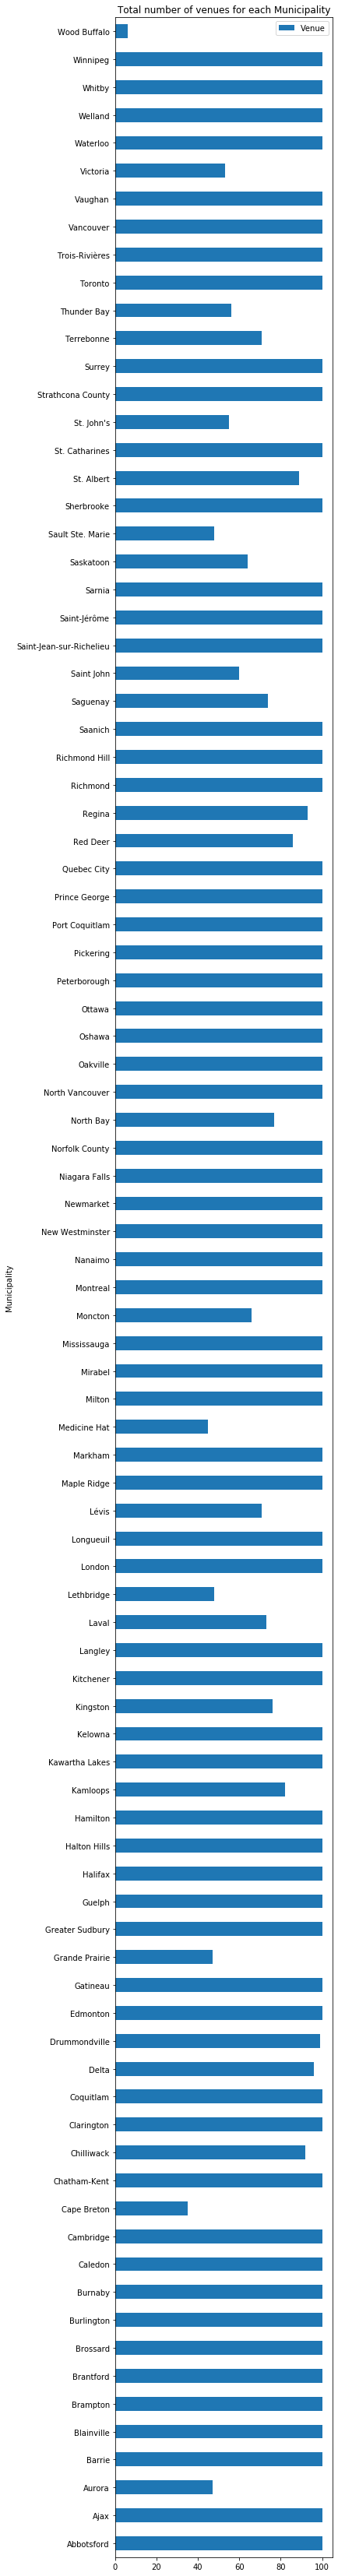

In [42]:
import matplotlib.pyplot as plot
plot.rcParams["figure.figsize"] = [5, 60]
dfa= dfa.reset_index()
dfa.plot.barh(x="Municipality" , y="Venue", rot=0, title="Total number of venues for each Municipality");

plot.show(block=True);

In [43]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Municipality     91 non-null     object
 1   Latitude         91 non-null     int64 
 2   Longitude        91 non-null     int64 
 3   Venue            91 non-null     int64 
 4   Venue Latitude   91 non-null     int64 
 5   Venue Longitude  91 non-null     int64 
 6   Venue Category   91 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.1+ KB


In [44]:
dfb=dfa['Venue']

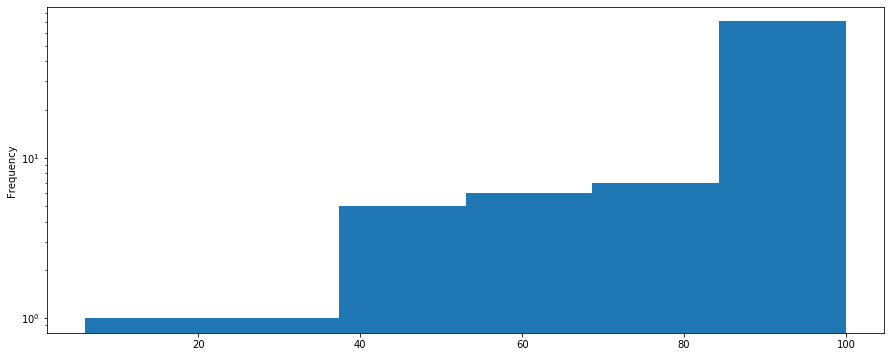

In [45]:
dfb.plot.hist( by='Venue', bins=6,log=True, figsize = (15,6) )

Let's find out how many unique categories can be curated from all the returned venues

In [47]:
print('There are {} uniques categories.'.format(len(Canada_venues['Venue Category'].unique())))

There are 309 uniques categories.


Let Us display the  uniques categorie 

In [48]:
from pandas import DataFrame
uniques_categories= DataFrame (Canada_venues['Venue Category'].unique())
uniques_categories.sort_values(by=[0])
uniques_categories.reindex() 
uniques_categories

0
0                       Neighborhood
1           Mediterranean Restaurant
2                            Theater
3                        Art Gallery
4                     Farmers Market
5                        Coffee Shop
6                  French Restaurant
7                              Hotel
8                     Cosmetics Shop
9                    Thai Restaurant
10                    Sandwich Place
11                      Dance Studio
12                Mexican Restaurant
13                              Park
14                      Dessert Shop
15                     Historic Site
16                             Diner
17                        Food Truck
18                            Hostel
19             Performing Arts Venue
20                           Brewery
21                             Plaza
22                        Restaurant
23                              Lake
24                      Cocktail Bar
25                            Bakery
26                        Comic Shop
27                            Garden
28                              Café
29                   Organic Grocery
30               Monument / Landmark
31              Gym / Fitness Center
32                           Butcher
33     Vegetarian / Vegan Restaurant
34                         Bookstore
35                      Liquor Store
36                         Gastropub
37                         Juice Bar
38                       Supermarket
39               Japanese Restaurant
40                         BBQ Joint
41                Athletics & Sports
42                    Ice Cream Shop
43                   Harbor / Marina
44                            Circus
45                           Dog Run
46                     Grocery Store
47                       Pizza Place
48                   Bubble Tea Shop
49                      Cupcake Shop
50                        Art Museum
51                    Clothing Store
52                       College Gym
53                               Gym
54                            Market
55                             Canal
56                     Deli / Bodega
57                      Concert Hall
58                       Music Venue
59                            Church
60         Middle Eastern Restaurant
61                    Scenic Lookout
62                      Gourmet Shop
63                        Bagel Shop
64                       Pastry Shop
65                               Spa
66                  Asian Restaurant
67                 Polish Restaurant
68             Portuguese Restaurant
69                       Salad Place
70              Outdoor Supply Store
71                      Hockey Arena
72                  Malay Restaurant
73                       Cheese Shop
74                               Pub
75                       Fish Market
76                        Beer Store
77              Other Great Outdoors
78                Seafood Restaurant
79                    Breakfast Spot
80                      Noodle House
81                     Memorial Site
82               Indie Movie Theater
83                  Football Stadium
84                     Movie Theater
85                        Taco Place
86                          Wine Bar
87              Fast Food Restaurant
88                  Tapas Restaurant
89                        Donut Shop
90                Italian Restaurant
91               Sporting Goods Shop
92                               Bar
93                          Beer Bar
94            Furniture / Home Store
95                       Golf Course
96                             Beach
97                   Warehouse Store
98                  Toy / Game Store
99                     National Park
100            Vietnamese Restaurant
101                        Nightclub
102                Korean Restaurant
103                Indian Restaurant
104                       Whisky Bar
105                       Steakhouse
106        Cajun / Creole Restaurant
107                           Lounge
10

Let us calculate the total number of venues in each category

In [49]:
Venues_category_Statistics= DataFrame (Canada_venues['Venue Category'].value_counts())

In [50]:
Venues_category_Statistics_a = Venues_category_Statistics 
Venues_category_Statistics_a.reset_index(inplace = True)
Venues_category_Statistics_a 

index  Venue Category
0                               Park             594
1                        Coffee Shop             458
2                               Café             333
3                      Grocery Store             292
4                         Restaurant             280
5                            Brewery             238
6                              Hotel             212
7                             Bakery             208
8                     Ice Cream Shop             197
9                        Pizza Place             161
10                               Pub             147
11              Fast Food Restaurant             122
12                    Sandwich Place             118
13                             Beach             114
14                               Bar             112
15               American Restaurant             108
16                    Farmers Market             103
17                         Gastropub             101
18                      Liquor Store              97
19                             Trail              97
20                Italian Restaurant              97
21                       Supermarket              94
22                         Bookstore              90
23                    Scenic Lookout              87
24                      Burger Joint              78
25                               Gym              77
26                    Breakfast Spot              77
27                Mexican Restaurant              72
28                             Diner              71
29                  Sushi Restaurant              70
30                          Pharmacy              69
31                      Dessert Shop              68
32                 French Restaurant              67
33                         BBQ Joint              66
34                     Historic Site              63
35                Seafood Restaurant              61
36                 Indian Restaurant              59
37                     Train Station              57
38               Japanese Restaurant              55
39                     Movie Theater              53
40                     Deli / Bodega              51
41               Sporting Goods Shop              50
42                        Steakhouse              50
43                             Plaza              47
44                   Warehouse Store              47
45                            Garden              43
46                       Golf Course              43
47                  Asian Restaurant              40
48                            Market              39
49                   Thai Restaurant              36
50                  Greek Restaurant              36
51                     Shopping Mall              36
52                       Gas Station              36
53                              Farm              36
54                           Theater              33
55                              Lake              32
56              Gym / Fitness Center              31
57             Vietnamese Restaurant              30
58                        Campground              29
59                      Hockey Arena              28
60     Vegetarian / Vegan Restaurant              28
61                   Harbor / Marina              28
62                  Department Store              27
63                    History Museum              27
64                      Gourmet Shop              27
65                         Wine Shop              27
66                           Dog Run              26
67                        Bagel Shop              26
68         Middle Eastern Restaurant              26
69                          Ski Area              24
70                     Garden Center              24
71                    Clothing Store              24
72                            Resort              23
73                          Tea Room              23
74                    Hardware Store              23
75 

Rename columns

In [51]:
Venues_category_Statistics_b=Venues_category_Statistics_a.rename(columns={'index':'Venue Category','Venue Category':'Count_Category' })
                 
Venues_category_Statistics_b

Venue Category  Count_Category
0                               Park             594
1                        Coffee Shop             458
2                               Café             333
3                      Grocery Store             292
4                         Restaurant             280
5                            Brewery             238
6                              Hotel             212
7                             Bakery             208
8                     Ice Cream Shop             197
9                        Pizza Place             161
10                               Pub             147
11              Fast Food Restaurant             122
12                    Sandwich Place             118
13                             Beach             114
14                               Bar             112
15               American Restaurant             108
16                    Farmers Market             103
17                         Gastropub             101
18                      Liquor Store              97
19                             Trail              97
20                Italian Restaurant              97
21                       Supermarket              94
22                         Bookstore              90
23                    Scenic Lookout              87
24                      Burger Joint              78
25                               Gym              77
26                    Breakfast Spot              77
27                Mexican Restaurant              72
28                             Diner              71
29                  Sushi Restaurant              70
30                          Pharmacy              69
31                      Dessert Shop              68
32                 French Restaurant              67
33                         BBQ Joint              66
34                     Historic Site              63
35                Seafood Restaurant              61
36                 Indian Restaurant              59
37                     Train Station              57
38               Japanese Restaurant              55
39                     Movie Theater              53
40                     Deli / Bodega              51
41               Sporting Goods Shop              50
42                        Steakhouse              50
43                             Plaza              47
44                   Warehouse Store              47
45                            Garden              43
46                       Golf Course              43
47                  Asian Restaurant              40
48                            Market              39
49                   Thai Restaurant              36
50                  Greek Restaurant              36
51                     Shopping Mall              36
52                       Gas Station              36
53                              Farm              36
54                           Theater              33
55                              Lake              32
56              Gym / Fitness Center              31
57             Vietnamese Restaurant              30
58                        Campground              29
59                      Hockey Arena              28
60     Vegetarian / Vegan Restaurant              28
61                   Harbor / Marina              28
62                  Department Store              27
63                    History Museum              27
64                      Gourmet Shop              27
65                         Wine Shop              27
66                           Dog Run              26
67                        Bagel Shop              26
68         Middle Eastern Restaurant              26
69                          Ski Area              24
70                     Garden Center              24
71                    Clothing Store              24
72                            Resort              23
73                          Tea Room              23
74                    Hardware Store           

select needed rows only

In [52]:
Venues_category_Statistics_c= Venues_category_Statistics_b.loc[(Venues_category_Statistics_b['Venue Category'] == 'Hotel') | (Venues_category_Statistics_b['Venue Category'] == 'Grocery Store')| (Venues_category_Statistics_b['Venue Category'] == 'Bakery')]
Venues_category_Statistics_c

Venue Category  Count_Category
3  Grocery Store             292
6          Hotel             212
7         Bakery             208

In [129]:
ss=Venues_category_Statistics_c.sum()
print(ss)

Venue Category    Grocery StoreHotelBakery
Count_Category                         712
dtype: object


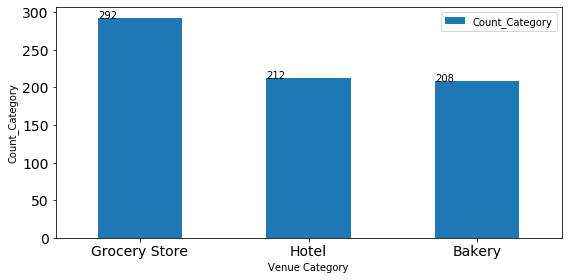

In [53]:
ax = Venues_category_Statistics_c.plot.bar(x='Venue Category', y='Count_Category', rot=0,figsize = (8,4),fontsize =14)
ax.set_ylabel('Count_Category')
from decimal import Decimal
import matplotlib.pyplot as plt
for p in ax.patches:
    ax.annotate('{:.5}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()


Let us exclude all venues except Hotel, Grocery store and Bakery 

In [54]:
tt = ['Hotel' , 'Grocery Store','Bakery' ]
Canada_venues1= Canada_venues[Canada_venues['Venue Category'].isin(tt)]
Canada_venues1.head(30)

Municipality   Latitude   Longitude  \
7        Toronto  43.653482  -79.383935   
34       Toronto  43.653482  -79.383935   
35       Toronto  43.653482  -79.383935   
42       Toronto  43.653482  -79.383935   
51       Toronto  43.653482  -79.383935   
77       Toronto  43.653482  -79.383935   
85       Toronto  43.653482  -79.383935   
92       Toronto  43.653482  -79.383935   
109     Montreal  45.497216  -73.610364   
123     Montreal  45.497216  -73.610364   
135     Montreal  45.497216  -73.610364   
138     Montreal  45.497216  -73.610364   
164     Montreal  45.497216  -73.610364   
175     Montreal  45.497216  -73.610364   
190     Montreal  45.497216  -73.610364   
191     Montreal  45.497216  -73.610364   
192     Montreal  45.497216  -73.610364   
199     Montreal  45.497216  -73.610364   
203       Ottawa  45.421106  -75.690308   
213       Ottawa  45.421106  -75.690308   
220       Ottawa  45.421106  -75.690308   
232       Ottawa  45.421106  -75.690308   
238       Ottawa  45.421106  -75.690308   
260       Ottawa  45.421106  -75.690308   
265       Ottawa  45.421106  -75.690308   
280       Ottawa  45.421106  -75.690308   
293       Ottawa  45.421106  -75.690308   
294       Ottawa  45.421106  -75.690308   
316     Edmonton  53.535411 -113.507996   
331     Edmonton  53.535411 -113.507996   

                                                 Venue  Venue Latitude  \
7                     Delta Hotels by Marriott Toronto       43.642882   
34                                       Forno Cultura       43.644296   
35                                           Sud Forno       43.646208   
42                                    Roselle Desserts       43.653447   
51                                 Blackbird Baking Co       43.654764   
77                                 The Broadview Hotel       43.659060   
85                                        Fiesta Farms       43.668471   
92                                              NADÈGE       43.645740   
109                              Boulangerie Guillaume       45.523405   
123                                   Milano Fruiterie       45.533055   
135                                     La Bête à Pain       45.493069   
138                                             Adonis       45.493895   
164                                    Mamie Clafoutis       45.518122   
175                                        Hof Kelsten       45.520385   
190                                Automne Boulangerie       45.537771   
191                                 Le Westin Montreal       45.503606   
192  Sweet Lee's Boulangerie Rustique / Saint-Henri...       45.462168   
199                                  Branche d'Olivier       45.460638   
203                           Fairmont Château Laurier       45.426241   
213                                   Art-Is-In Bakery       45.408011   
220                                           Farm Boy       45.411058   
232                                             Hilton       45.447301   
238                               Mid East Food Centre       45.410475   
260                                           Farm Boy       45.396067   
265                                           Farm Boy       45.425384   
280                                           Farm Boy       45.477637   
293                                  Brookstreet Hotel       45.347967   
294                                           Farm Boy       45.288313   
316                                  Duchess Bake Shop       53.551551   
331                           Italian Centre Shop Ltd.       53.487442   

     Venue Longitude Venue Category  
7         -79.383949          Hotel  
34        -79.400715         Bakery  
35        -79.408986         Bakery  
42        -79.362017         Bakery  
51        -79.400566         Bakery  
77        -79.350030          Hotel  
85        -79.420485  Grocery Store  
92        -79.411474         Bakery  
109       -73.593662         Bake

Reset the index of the data frame

In [55]:
Canada_venues1.reset_index(drop=True,inplace=True )
Canada_venues1.head(10)

Municipality   Latitude  Longitude                             Venue  \
0      Toronto  43.653482 -79.383935  Delta Hotels by Marriott Toronto   
1      Toronto  43.653482 -79.383935                     Forno Cultura   
2      Toronto  43.653482 -79.383935                         Sud Forno   
3      Toronto  43.653482 -79.383935                  Roselle Desserts   
4      Toronto  43.653482 -79.383935               Blackbird Baking Co   
5      Toronto  43.653482 -79.383935               The Broadview Hotel   
6      Toronto  43.653482 -79.383935                      Fiesta Farms   
7      Toronto  43.653482 -79.383935                            NADÈGE   
8     Montreal  45.497216 -73.610364             Boulangerie Guillaume   
9     Montreal  45.497216 -73.610364                  Milano Fruiterie   

   Venue Latitude  Venue Longitude Venue Category  
0       43.642882       -79.383949          Hotel  
1       43.644296       -79.400715         Bakery  
2       43.646208       -79.408986         Bakery  
3       43.653447       -79.362017         Bakery  
4       43.654764       -79.400566         Bakery  
5       43.659060       -79.350030          Hotel  
6       43.668471       -79.420485  Grocery Store  
7       43.645740       -79.411474         Bakery  
8       45.523405       -73.593662         Bakery  
9       45.533055       -73.614722  Grocery Store

In [56]:
Canada_venues1.shape

(712, 7)

# Analyze Each Municipality

In [57]:
Canada_venues=Canada_venues1

In [58]:
# one hot encoding
Canada_onehot = pd.get_dummies(Canada_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Canada_onehot['Municipality'] = Canada_venues['Municipality'] 

# move neighborhood column to the first column
fixed_columns = [Canada_onehot.columns[-1]] + list(Canada_onehot.columns[:-1])
Canada_onehot = Canada_onehot[fixed_columns]

Canada_onehot.head(10)

Municipality  Bakery  Grocery Store  Hotel
0      Toronto       0              0      1
1      Toronto       1              0      0
2      Toronto       1              0      0
3      Toronto       1              0      0
4      Toronto       1              0      0
5      Toronto       0              0      1
6      Toronto       0              1      0
7      Toronto       1              0      0
8     Montreal       1              0      0
9     Montreal       0              1      0

In [59]:
Canada_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Municipality   712 non-null    object
 1   Bakery         712 non-null    uint8 
 2   Grocery Store  712 non-null    uint8 
 3   Hotel          712 non-null    uint8 
dtypes: object(1), uint8(3)
memory usage: 7.8+ KB


Group rows by Munipalities and by taking the mean of the frequency of occurrence of venues category

In [60]:
Canada_grouped = Canada_onehot.groupby('Municipality').mean().reset_index()
Canada_grouped.head()

Municipality    Bakery  Grocery Store     Hotel
0   Abbotsford  0.200000       0.400000  0.400000
1         Ajax  0.333333       0.333333  0.333333
2       Aurora  0.333333       0.000000  0.666667
3       Barrie  0.500000       0.375000  0.125000
4   Blainville  0.500000       0.400000  0.100000

In [61]:
num_top_venues = 3

 

for hood in Canada_grouped['Municipality']:

    print("----"+hood+"----")

    temp = Canada_grouped[Canada_grouped['Municipality'] == hood].T.reset_index()

    temp.columns = ['venue','freq']

    temp = temp.iloc[1:]

    temp['freq'] = temp['freq'].astype(float)

    temp = temp.round({'freq': 2})

    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

    print('\n')

----Abbotsford----
           venue  freq
0  Grocery Store   0.4
1          Hotel   0.4
2         Bakery   0.2


----Ajax----
           venue  freq
0         Bakery  0.33
1  Grocery Store  0.33
2          Hotel  0.33


----Aurora----
           venue  freq
0          Hotel  0.67
1         Bakery  0.33
2  Grocery Store  0.00


----Barrie----
           venue  freq
0         Bakery  0.50
1  Grocery Store  0.38
2          Hotel  0.12


----Blainville----
           venue  freq
0         Bakery   0.5
1  Grocery Store   0.4
2          Hotel   0.1


----Brampton----
           venue  freq
0         Bakery  0.54
1  Grocery Store  0.31
2          Hotel  0.15


----Brantford----
           venue  freq
0  Grocery Store  0.50
1         Bakery  0.25
2          Hotel  0.25


----Brossard----
           venue  freq
0         Bakery  0.55
1  Grocery Store  0.36
2          Hotel  0.09


----Burlington----
           venue  freq
0         Bakery  0.50
1  Grocery Store  0.25
2          Hotel  0.25


--

           venue  freq
0  Grocery Store   0.6
1         Bakery   0.2
2          Hotel   0.2


----Welland----
           venue  freq
0  Grocery Store  0.43
1          Hotel  0.43
2         Bakery  0.14


----Whitby----
           venue  freq
0  Grocery Store  0.50
1          Hotel  0.33
2         Bakery  0.17


----Winnipeg----
           venue  freq
0  Grocery Store  0.50
1         Bakery  0.33
2          Hotel  0.17


----Wood Buffalo----
           venue  freq
0          Hotel   1.0
1         Bakery   0.0
2  Grocery Store   0.0




Let's put that into a pandas dataframe

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Municipality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Canada_venues_sorted = pd.DataFrame(columns=columns)
Canada_venues_sorted['Municipality'] = Canada_grouped['Municipality']

for ind in np.arange(Canada_grouped.shape[0]):
    Canada_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Canada_grouped.iloc[ind, :], num_top_venues)

Canada_venues_sorted 

Municipality 1st Most Common Venue 2nd Most Common Venue  \
0                 Abbotsford                 Hotel         Grocery Store   
1                       Ajax                 Hotel         Grocery Store   
2                     Aurora                 Hotel                Bakery   
3                     Barrie                Bakery         Grocery Store   
4                 Blainville                Bakery         Grocery Store   
5                   Brampton                Bakery         Grocery Store   
6                  Brantford         Grocery Store                 Hotel   
7                   Brossard                Bakery         Grocery Store   
8                 Burlington                Bakery                 Hotel   
9                    Burnaby                 Hotel                Bakery   
10                   Caledon                Bakery         Grocery Store   
11                 Cambridge                Bakery                 Hotel   
12               Cape Breton                Bakery                 Hotel   
13              Chatham-Kent         Grocery Store                 Hotel   
14                Chilliwack         Grocery Store                Bakery   
15                Clarington         Grocery Store                Bakery   
16                 Coquitlam                 Hotel                Bakery   
17                     Delta         Grocery Store                 Hotel   
18             Drummondville         Grocery Store                 Hotel   
19                  Edmonton         Grocery Store                Bakery   
20                  Gatineau         Grocery Store                 Hotel   
21            Grande Prairie         Grocery Store                 Hotel   
22           Greater Sudbury         Grocery Store                 Hotel   
23                    Guelph         Grocery Store                Bakery   
24                   Halifax         Grocery Store                Bakery   
25              Halton Hills         Grocery Store                Bakery   
26                  Hamilton         Grocery Store                Bakery   
27                  Kamloops                 Hotel         Grocery Store   
28            Kawartha Lakes         Grocery Store                Bakery   
29                   Kelowna                 Hotel                Bakery   
30                  Kingston                 Hotel                Bakery   
31                 Kitchener         Grocery Store                Bakery   
32                   Langley                 Hotel         Grocery Store   
33                     Laval                 Hotel         Grocery Store   
34                Lethbridge                 Hotel         Grocery Store   
35                    London                 Hotel                Bakery   
36                 Longueuil                Bakery         Grocery Store   
37                     Lévis                 Hotel         Grocery Store   
38               Maple Ridge                 Hotel                Bakery   
39                   Markham         Grocery Store                 Hotel   
40              Medicine Hat         Grocery Store                 Hotel   
41                    Milton         Grocery Store                 Hotel   
42                   Mirabel                 Hotel         Grocery Store   
43               Mississauga                Bakery         Grocery Store   
44                   Moncton                 Hotel         Grocery Store   
45                  Montreal                Bakery         Grocery Store   
46                   Nanaimo         Grocery Store                Bakery   
47           New Westminster                 Hotel                Bakery   
48                 Newmarket                 Hotel                Bakery   
49             Niagara Falls         Grocery Store                 Hotel   
50            Norfolk County                Bakery         Grocery Store   
51                 North Bay         Grocery Store              

In [64]:
Canada_venues_sorted =Canada_venues_sorted .drop_duplicates()
Canada_venues_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Municipality           91 non-null     object
 1   1st Most Common Venue  91 non-null     object
 2   2nd Most Common Venue  91 non-null     object
 3   3rd Most Common Venue  91 non-null     object
dtypes: object(4)
memory usage: 3.6+ KB


In [65]:
Canada_grouped.var()

Bakery           0.044482
Grocery Store    0.070660
Hotel            0.065194
dtype: float64

# Cluster Municipalities

Run k-means to cluster the Municipalities of Canada into 3 clusters.

In [66]:
# set number of clusters
kclusters = 3
Canada_grouped_clustering = Canada_grouped.drop('Municipality', 1)

# run k-means clustering
kmeans = KMeans(algorithm = 'full', init="k-means++",n_init=1000, max_iter=600, n_clusters=kclusters, random_state= 42).fit(Canada_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_ 
labels = kmeans.labels_
print(labels)
#Canada_grouped_clustering 

[0 1 2 1 1 1 0 1 1 1 1 1 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 2 2 2 2 1
 2 2 0 0 0 2 1 2 1 0 1 1 0 1 0 1 1 0 0 1 1 2 1 0 0 0 0 0 0 0 0 1 0 1 1 0 2
 0 0 1 0 2 0 2 1 0 1 1 0 0 0 0 0 2]


In [67]:
labels1 = kmeans.labels_
labels1

array([0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 2], dtype=int32)

In [68]:
Canada_grouped["Clus_km"] = labels
Canada_grouped.head(100)

Municipality    Bakery  Grocery Store     Hotel  Clus_km
0                 Abbotsford  0.200000       0.400000  0.400000        0
1                       Ajax  0.333333       0.333333  0.333333        1
2                     Aurora  0.333333       0.000000  0.666667        2
3                     Barrie  0.500000       0.375000  0.125000        1
4                 Blainville  0.500000       0.400000  0.100000        1
5                   Brampton  0.538462       0.307692  0.153846        1
6                  Brantford  0.250000       0.500000  0.250000        0
7                   Brossard  0.545455       0.363636  0.090909        1
8                 Burlington  0.500000       0.250000  0.250000        1
9                    Burnaby  0.500000       0.000000  0.500000        1
10                   Caledon  0.500000       0.375000  0.125000        1
11                 Cambridge  0.600000       0.200000  0.200000        1
12               Cape Breton  0.800000       0.000000  0.200000        1
13              Chatham-Kent  0.000000       0.800000  0.200000        0
14                Chilliwack  0.333333       0.666667  0.000000        0
15                Clarington  0.333333       0.500000  0.166667        0
16                 Coquitlam  0.375000       0.000000  0.625000        2
17                     Delta  0.125000       0.500000  0.375000        0
18             Drummondville  0.000000       0.538462  0.461538        0
19                  Edmonton  0.428571       0.571429  0.000000        0
20                  Gatineau  0.100000       0.600000  0.300000        0
21            Grande Prairie  0.000000       1.000000  0.000000        0
22           Greater Sudbury  0.125000       0.500000  0.375000        0
23                    Guelph  0.400000       0.600000  0.000000        0
24                   Halifax  0.250000       0.750000  0.000000        0
25              Halton Hills  0.384615       0.615385  0.000000        0
26                  Hamilton  0.285714       0.714286  0.000000        0
27                  Kamloops  0.000000       0.250000  0.750000        2
28            Kawartha Lakes  0.200000       0.800000  0.000000        0
29                   Kelowna  0.375000       0.250000  0.375000        1
30                  Kingston  0.125000       0.000000  0.875000        2
31                 Kitchener  0.272727       0.636364  0.090909        0
32                   Langley  0.000000       0.000000  1.000000        2
33                     Laval  0.000000       0.142857  0.857143        2
34                Lethbridge  0.000000       0.250000  0.750000        2
35                    London  0.272727       0.181818  0.545455        2
36                 Longueuil  0.583333       0.333333  0.083333        1
37                     Lévis  0.111111       0.111111  0.777778        2
38               Maple Ridge  0.333333       0.000000  0.666667        2
39                   Markham  0.285714       0.428571  0.285714        0
40              Medicine Hat  0.000000       0.800000  0.200000        0
41                    Milton  0.100000       0.700000  0.200000        0
42                   Mirabel  0.000000       0.125000  0.875000        2
43               Mississauga  0.583333       0.333333  0.083333        1
44                   Moncton  0.250000       0.250000  0.500000        2
45                  Montreal  0.600000       0.300000  0.100000        1
46                   Nanaimo  0.307692       0.461538  0.230769        0
47           New Westminster  0.500000       0.000000  0.500000        1
48                 Newmarket  0.428571       0.142857  0.428571        1
49             Niagara Falls  0.166667       0.500000  0.333333        0
50            Norfolk County  0.692308       0.230769  0.076923        1
51                 North Bay  0.000000       0.714286  0.285714        0
52           North Vancouver  0.500000       0.000000  0.500000        1
53                  Oakville  0.583333       0.333333  0.083333        1
5

In [69]:
Canada_grouped_clustering.loc [:, 'Hotel']

0     0.400000
1     0.333333
2     0.666667
3     0.125000
4     0.100000
5     0.153846
6     0.250000
7     0.090909
8     0.250000
9     0.500000
10    0.125000
11    0.200000
12    0.200000
13    0.200000
14    0.000000
15    0.166667
16    0.625000
17    0.375000
18    0.461538
19    0.000000
20    0.300000
21    0.000000
22    0.375000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.750000
28    0.000000
29    0.375000
30    0.875000
31    0.090909
32    1.000000
33    0.857143
34    0.750000
35    0.545455
36    0.083333
37    0.777778
38    0.666667
39    0.285714
40    0.200000
41    0.200000
42    0.875000
43    0.083333
44    0.500000
45    0.100000
46    0.230769
47    0.500000
48    0.428571
49    0.333333
50    0.076923
51    0.285714
52    0.500000
53    0.083333
54    0.000000
55    0.300000
56    0.500000
57    0.428571
58    0.714286
59    0.285714
60    0.200000
61    0.300000
62    0.250000
63    0.285714
64    0.166667
65    0.166667
66    0.33

We can easily check the centroid values by averaging the features in each cluster

In [70]:
Canada_grouped.groupby('Clus_km').mean()

Bakery  Grocery Store     Hotel
Clus_km                                   
0        0.180039       0.623185  0.196776
1        0.520840       0.227666  0.251494
2        0.142327       0.104883  0.752791

In [71]:
Canada_grouped.groupby('Clus_km').count()

Municipality  Bakery  Grocery Store  Hotel
Clus_km                                            
0                  45      45             45     45
1                  29      29             29     29
2                  17      17             17     17

List the distribution the number of Bakery, Grocery Store and Hotel

In [72]:
X = Canada_grouped_clustering.values[:,0:]
X

array([[0.2       , 0.4       , 0.4       ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.        , 0.66666667],
       [0.5       , 0.375     , 0.125     ],
       [0.5       , 0.4       , 0.1       ],
       [0.53846154, 0.30769231, 0.15384615],
       [0.25      , 0.5       , 0.25      ],
       [0.54545455, 0.36363636, 0.09090909],
       [0.5       , 0.25      , 0.25      ],
       [0.5       , 0.        , 0.5       ],
       [0.5       , 0.375     , 0.125     ],
       [0.6       , 0.2       , 0.2       ],
       [0.8       , 0.        , 0.2       ],
       [0.        , 0.8       , 0.2       ],
       [0.33333333, 0.66666667, 0.        ],
       [0.33333333, 0.5       , 0.16666667],
       [0.375     , 0.        , 0.625     ],
       [0.125     , 0.5       , 0.375     ],
       [0.        , 0.53846154, 0.46153846],
       [0.42857143, 0.57142857, 0.        ],
       [0.1       , 0.6       , 0.3       ],
       [0.        , 1.        , 0.        ],
       [0.

In [73]:
np.shape(X)

(91, 3)

Diisribution of Municipalities based on the frequency of the Hotel, Grocery Store and Bakery

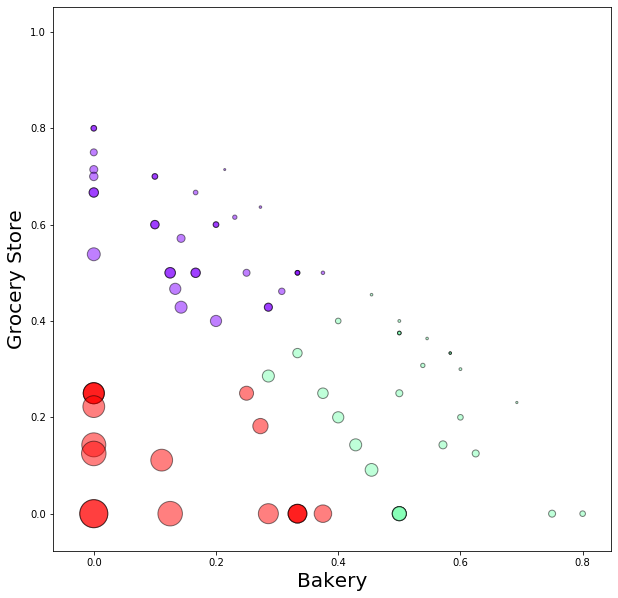

In [74]:
fig = plt.figure(1, figsize=(10, 10))
area = 250* np.pi * ( X[:, 2])**2
plt.scatter(X[:, 0], X[:, 1], s=area, c=  labels1.astype(np.float), alpha= .5,  cmap ="rainbow", edgecolor='black')
plt.xlabel('Bakery', fontsize=20)
plt.ylabel('Grocery Store', fontsize=20)

plt.show()

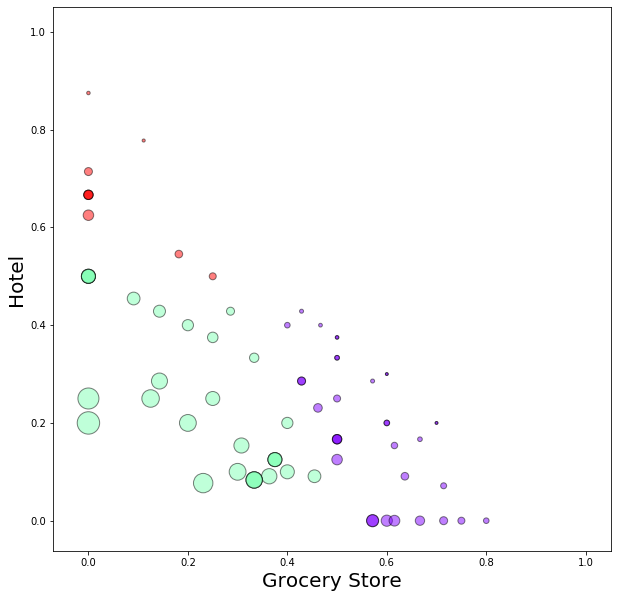

In [75]:
fig = plt.figure(1, figsize=(10, 10))
area = 250* np.pi * ( X[:, 0])**2
plt.scatter(X[:, 1], X[:, 2], s=area, c=  labels1.astype(np.float), alpha= .5,  cmap ="rainbow", edgecolor='black')
plt.xlabel('Grocery Store', fontsize=20)
plt.ylabel('Hotel', fontsize=20)

plt.show()

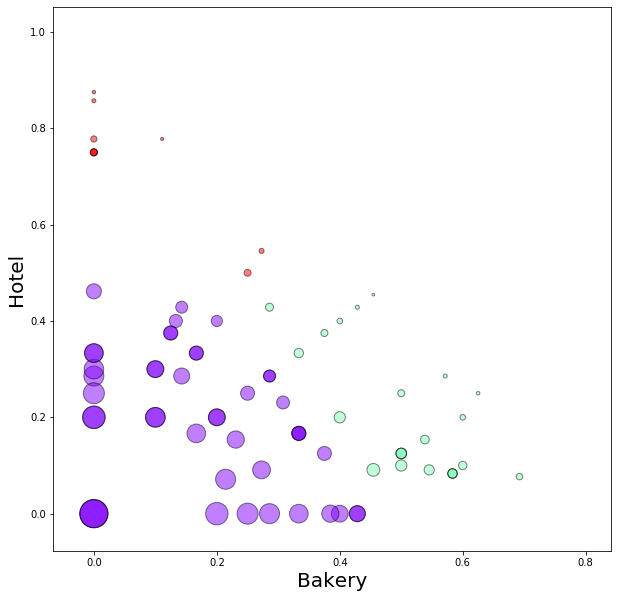

In [76]:
ig = plt.figure(1, figsize=(10, 10))
area = 250* np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 2], s=area, c=  labels1.astype(np.float), alpha= .5, cmap=plt.cm.rainbow, edgecolor='black')
plt.xlabel('Bakery', fontsize=20)
plt.ylabel('Hotel', fontsize=20)

plt.show()

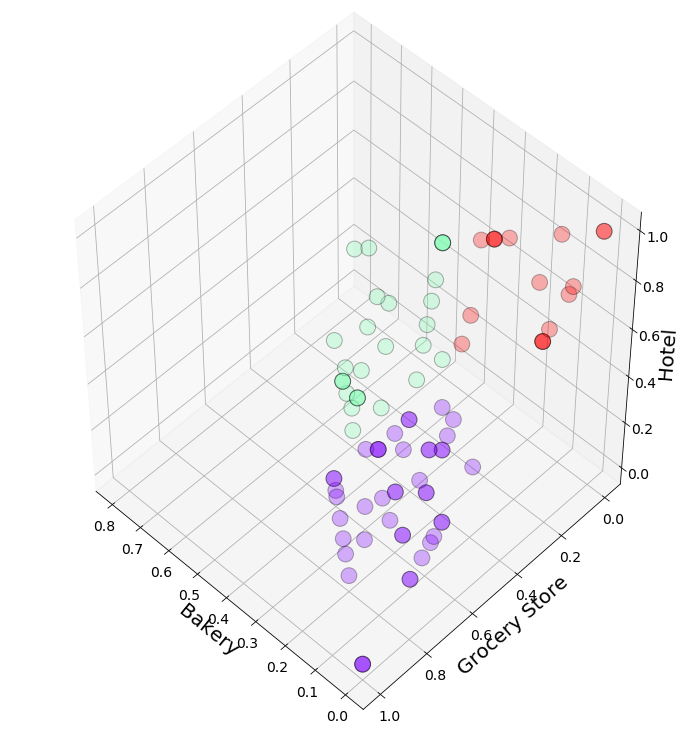

In [77]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(10, 10))

plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
#plt.fontsize = 25
ax.zaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(grid_label =16)
plt.xlabel('Bakery', fontsize=20)
plt.ylabel('Grocery Store', fontsize=20)

ax.set_zlabel('Hotel', fontsize=20)
ax.clabel( inline=True, fontsize=30)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels1 .astype(np.float),s=250, alpha =.3, cmap=plt.cm.rainbow,edgecolor='black' )


Filter the df to get the Municipality that have venue data only

In [78]:
dfa = dfa.drop_duplicates(subset=['Municipality'])

In [79]:
dfb = pd.merge(dfa, df, left_on='Municipality',right_on='Municipality',suffixes=(' ', ' '),  how='inner')
dfb

Municipality  Latitude  Longitude  Venue  Venue Latitude  \
0                 Abbotsford       100        100    100             100   
1                       Ajax       100        100    100             100   
2                     Aurora        47         47     47              47   
3                     Barrie       100        100    100             100   
4                 Blainville       100        100    100             100   
5                   Brampton       100        100    100             100   
6                  Brantford       100        100    100             100   
7                   Brossard       100        100    100             100   
8                 Burlington       100        100    100             100   
9                    Burnaby       100        100    100             100   
10                   Caledon       100        100    100             100   
11                 Cambridge       100        100    100             100   
12               Cape Breton        35         35     35              35   
13              Chatham-Kent       100        100    100             100   
14                Chilliwack        92         92     92              92   
15                Clarington       100        100    100             100   
16                 Coquitlam       100        100    100             100   
17                     Delta        96         96     96              96   
18             Drummondville        99         99     99              99   
19                  Edmonton       100        100    100             100   
20                  Gatineau       100        100    100             100   
21            Grande Prairie        47         47     47              47   
22           Greater Sudbury       100        100    100             100   
23                    Guelph       100        100    100             100   
24                   Halifax       100        100    100             100   
25              Halton Hills       100        100    100             100   
26                  Hamilton       100        100    100             100   
27                  Kamloops        82         82     82              82   
28            Kawartha Lakes       100        100    100             100   
29                   Kelowna       100        100    100             100   
30                  Kingston        76         76     76              76   
31                 Kitchener       100        100    100             100   
32                   Langley       100        100    100             100   
33                     Laval        73         73     73              73   
34                Lethbridge        48         48     48              48   
35                    London       100        100    100             100   
36                 Longueuil       100        100    100             100   
37                     Lévis        71         71     71              71   
38               Maple Ridge       100        100    100             100   
39                   Markham       100        100    100             100   
40              Medicine Hat        45         45     45              45   
41                    Milton       100        100    100             100   
42                   Mirabel       100        100    100             100   
43               Mississauga       100        100    100             100   
44                   Moncton        66         66     66              66   
45                  Montreal       100        100    100             100   
46                   Nanaimo       100        100    100             100   
47           New Westminster       100        100    100             100   
48                 Newmarket       100        100    100             100   
49             Niagara Falls       100        100    100             100   
50            Norfolk County       100        100    100             100   
51                 North Bay        77         77     77        

In [80]:
dfb=dfb.drop_duplicates()
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Municipality           92 non-null     object 
 1   Latitude               92 non-null     int64  
 2   Longitude              92 non-null     int64  
 3   Venue                  92 non-null     int64  
 4   Venue Latitude         92 non-null     int64  
 5   Venue Longitude        92 non-null     int64  
 6   Venue Category         92 non-null     int64  
 7   Province               92 non-null     object 
 8   Land area(km2, 2011)   92 non-null     float64
 9   Growth Rate 2011–2016  92 non-null     object 
 10  Population2016         92 non-null     int64  
 11  lat                    92 non-null     object 
 12  lng                    92 non-null     object 
dtypes: float64(1), int64(7), object(5)
memory usage: 10.1+ KB


### Let's create a new dataframe that includes the cluster as well as the  3 venues for of interest

In [81]:
# add clustering labels
Canada_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)

Canada_merged = dfb

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood'CommonName'
Canada_merged = Canada_merged.join(Canada_venues_sorted.set_index('Municipality'), on='Municipality')

Canada_merged  # check the last columns!
#World_Capital_venues_sorted
#World_Capital_merged 


Municipality  Latitude  Longitude  Venue  Venue Latitude  \
0                 Abbotsford       100        100    100             100   
1                       Ajax       100        100    100             100   
2                     Aurora        47         47     47              47   
3                     Barrie       100        100    100             100   
4                 Blainville       100        100    100             100   
5                   Brampton       100        100    100             100   
6                  Brantford       100        100    100             100   
7                   Brossard       100        100    100             100   
8                 Burlington       100        100    100             100   
9                    Burnaby       100        100    100             100   
10                   Caledon       100        100    100             100   
11                 Cambridge       100        100    100             100   
12               Cape Breton        35         35     35              35   
13              Chatham-Kent       100        100    100             100   
14                Chilliwack        92         92     92              92   
15                Clarington       100        100    100             100   
16                 Coquitlam       100        100    100             100   
17                     Delta        96         96     96              96   
18             Drummondville        99         99     99              99   
19                  Edmonton       100        100    100             100   
20                  Gatineau       100        100    100             100   
21            Grande Prairie        47         47     47              47   
22           Greater Sudbury       100        100    100             100   
23                    Guelph       100        100    100             100   
24                   Halifax       100        100    100             100   
25              Halton Hills       100        100    100             100   
26                  Hamilton       100        100    100             100   
27                  Kamloops        82         82     82              82   
28            Kawartha Lakes       100        100    100             100   
29                   Kelowna       100        100    100             100   
30                  Kingston        76         76     76              76   
31                 Kitchener       100        100    100             100   
32                   Langley       100        100    100             100   
33                     Laval        73         73     73              73   
34                Lethbridge        48         48     48              48   
35                    London       100        100    100             100   
36                 Longueuil       100        100    100             100   
37                     Lévis        71         71     71              71   
38               Maple Ridge       100        100    100             100   
39                   Markham       100        100    100             100   
40              Medicine Hat        45         45     45              45   
41                    Milton       100        100    100             100   
42                   Mirabel       100        100    100             100   
43               Mississauga       100        100    100             100   
44                   Moncton        66         66     66              66   
45                  Montreal       100        100    100             100   
46                   Nanaimo       100        100    100             100   
47           New Westminster       100        100    100             100   
48                 Newmarket       100        100    100             100   
49             Niagara Falls       100        100    100             100   
50            Norfolk County       100        100    100             100   
51                 North Bay        77         77     77        

Drop the nan value from cluster lables

In [82]:
Canada_merged.dropna (subset=['Cluster Labels'], inplace=True)
Canada_merged 

Municipality  Latitude  Longitude  Venue  Venue Latitude  \
0                 Abbotsford       100        100    100             100   
1                       Ajax       100        100    100             100   
2                     Aurora        47         47     47              47   
3                     Barrie       100        100    100             100   
4                 Blainville       100        100    100             100   
5                   Brampton       100        100    100             100   
6                  Brantford       100        100    100             100   
7                   Brossard       100        100    100             100   
8                 Burlington       100        100    100             100   
9                    Burnaby       100        100    100             100   
10                   Caledon       100        100    100             100   
11                 Cambridge       100        100    100             100   
12               Cape Breton        35         35     35              35   
13              Chatham-Kent       100        100    100             100   
14                Chilliwack        92         92     92              92   
15                Clarington       100        100    100             100   
16                 Coquitlam       100        100    100             100   
17                     Delta        96         96     96              96   
18             Drummondville        99         99     99              99   
19                  Edmonton       100        100    100             100   
20                  Gatineau       100        100    100             100   
21            Grande Prairie        47         47     47              47   
22           Greater Sudbury       100        100    100             100   
23                    Guelph       100        100    100             100   
24                   Halifax       100        100    100             100   
25              Halton Hills       100        100    100             100   
26                  Hamilton       100        100    100             100   
27                  Kamloops        82         82     82              82   
28            Kawartha Lakes       100        100    100             100   
29                   Kelowna       100        100    100             100   
30                  Kingston        76         76     76              76   
31                 Kitchener       100        100    100             100   
32                   Langley       100        100    100             100   
33                     Laval        73         73     73              73   
34                Lethbridge        48         48     48              48   
35                    London       100        100    100             100   
36                 Longueuil       100        100    100             100   
37                     Lévis        71         71     71              71   
38               Maple Ridge       100        100    100             100   
39                   Markham       100        100    100             100   
40              Medicine Hat        45         45     45              45   
41                    Milton       100        100    100             100   
42                   Mirabel       100        100    100             100   
43               Mississauga       100        100    100             100   
44                   Moncton        66         66     66              66   
45                  Montreal       100        100    100             100   
46                   Nanaimo       100        100    100             100   
47           New Westminster       100        100    100             100   
48                 Newmarket       100        100    100             100   
49             Niagara Falls       100        100    100             100   
50            Norfolk County       100        100    100             100   
51                 North Bay        77         77     77        

In [83]:
Canada_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Municipality           92 non-null     object 
 1   Latitude               92 non-null     int64  
 2   Longitude              92 non-null     int64  
 3   Venue                  92 non-null     int64  
 4   Venue Latitude         92 non-null     int64  
 5   Venue Longitude        92 non-null     int64  
 6   Venue Category         92 non-null     int64  
 7   Province               92 non-null     object 
 8   Land area(km2, 2011)   92 non-null     float64
 9   Growth Rate 2011–2016  92 non-null     object 
 10  Population2016         92 non-null     int64  
 11  lat                    92 non-null     object 
 12  lng                    92 non-null     object 
 13  Cluster Labels         92 non-null     int32  
 14  1st Most Common Venue  92 non-null     object 
 15  2nd Most

In [84]:
Canada_merged=Canada_merged.drop_duplicates()
Canada_merged

Municipality  Latitude  Longitude  Venue  Venue Latitude  \
0                 Abbotsford       100        100    100             100   
1                       Ajax       100        100    100             100   
2                     Aurora        47         47     47              47   
3                     Barrie       100        100    100             100   
4                 Blainville       100        100    100             100   
5                   Brampton       100        100    100             100   
6                  Brantford       100        100    100             100   
7                   Brossard       100        100    100             100   
8                 Burlington       100        100    100             100   
9                    Burnaby       100        100    100             100   
10                   Caledon       100        100    100             100   
11                 Cambridge       100        100    100             100   
12               Cape Breton        35         35     35              35   
13              Chatham-Kent       100        100    100             100   
14                Chilliwack        92         92     92              92   
15                Clarington       100        100    100             100   
16                 Coquitlam       100        100    100             100   
17                     Delta        96         96     96              96   
18             Drummondville        99         99     99              99   
19                  Edmonton       100        100    100             100   
20                  Gatineau       100        100    100             100   
21            Grande Prairie        47         47     47              47   
22           Greater Sudbury       100        100    100             100   
23                    Guelph       100        100    100             100   
24                   Halifax       100        100    100             100   
25              Halton Hills       100        100    100             100   
26                  Hamilton       100        100    100             100   
27                  Kamloops        82         82     82              82   
28            Kawartha Lakes       100        100    100             100   
29                   Kelowna       100        100    100             100   
30                  Kingston        76         76     76              76   
31                 Kitchener       100        100    100             100   
32                   Langley       100        100    100             100   
33                     Laval        73         73     73              73   
34                Lethbridge        48         48     48              48   
35                    London       100        100    100             100   
36                 Longueuil       100        100    100             100   
37                     Lévis        71         71     71              71   
38               Maple Ridge       100        100    100             100   
39                   Markham       100        100    100             100   
40              Medicine Hat        45         45     45              45   
41                    Milton       100        100    100             100   
42                   Mirabel       100        100    100             100   
43               Mississauga       100        100    100             100   
44                   Moncton        66         66     66              66   
45                  Montreal       100        100    100             100   
46                   Nanaimo       100        100    100             100   
47           New Westminster       100        100    100             100   
48                 Newmarket       100        100    100             100   
49             Niagara Falls       100        100    100             100   
50            Norfolk County       100        100    100             100   
51                 North Bay        77         77     77        

# visualizing the resulting clusters

In [85]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Canada_merged['lat'], Canada_merged['lng'], Canada_merged['Municipality'], Canada_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
   
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[int(cluster-1)],
        #olor='blue',
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        #fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

# To visualize  the map please copy the Giyhub-link of this notebook and past it in the following website:
https://nbviewer.jupyter.org/

Let up print some statistics

In [86]:
Canada_onehot.head()

Municipality  Bakery  Grocery Store  Hotel
0      Toronto       0              0      1
1      Toronto       1              0      0
2      Toronto       1              0      0
3      Toronto       1              0      0
4      Toronto       1              0      0

In [87]:
Canada_onehot_grouped = Canada_onehot.groupby(by="Municipality").agg({'Bakery': 'sum','Grocery Store': 'sum','Hotel': 'sum'})
Canada_onehot_grouped =pd.DataFrame(Canada_onehot_grouped).reset_index() 
Canada_onehot_grouped

Municipality  Bakery  Grocery Store  Hotel
0                 Abbotsford       1              2      2
1                       Ajax       2              2      2
2                     Aurora       1              0      2
3                     Barrie       4              3      1
4                 Blainville       5              4      1
5                   Brampton       7              4      2
6                  Brantford       1              2      1
7                   Brossard       6              4      1
8                 Burlington       2              1      1
9                    Burnaby       5              0      5
10                   Caledon       4              3      1
11                 Cambridge       3              1      1
12               Cape Breton       4              0      1
13              Chatham-Kent       0              4      1
14                Chilliwack       1              2      0
15                Clarington       2              3      1
16                 Coquitlam       3              0      5
17                     Delta       1              4      3
18             Drummondville       0              7      6
19                  Edmonton       3              4      0
20                  Gatineau       1              6      3
21            Grande Prairie       0              2      0
22           Greater Sudbury       1              4      3
23                    Guelph       4              6      0
24                   Halifax       1              3      0
25              Halton Hills       5              8      0
26                  Hamilton       4             10      0
27                  Kamloops       0              2      6
28            Kawartha Lakes       1              4      0
29                   Kelowna       3              2      3
30                  Kingston       1              0      7
31                 Kitchener       3              7      1
32                   Langley       0              0      4
33                     Laval       0              1      6
34                Lethbridge       0              1      3
35                    London       3              2      6
36                 Longueuil       7              4      1
37                     Lévis       1              1      7
38               Maple Ridge       1              0      2
39                   Markham       2              3      2
40              Medicine Hat       0              4      1
41                    Milton       1              7      2
42                   Mirabel       0              1      7
43               Mississauga       7              4      1
44                   Moncton       1              1      2
45                  Montreal       6              3      1
46                   Nanaimo       4              6      3
47           New Westminster       5              0      5
48                 Newmarket       3              1      3
49             Niagara Falls       1              3      2
50            Norfolk County       9              3      1
51                 North Bay       0              5      2
52           North Vancouver       5              0      5
53                  Oakville       7              4      1
54                    Oshawa       3              4      0
55                    Ottawa       1              6      3
56              Peterborough       2              0      2
57                 Pickering       2              2      3
58            Port Coquitlam       2              0      5
59             Prince George       4              1      2
60               Quebec City       2              6      2
61                  Red Deer       0              7      3
62                    Regina       0              6      2
63                  Richmond       2              3      2
64             Richmond Hill       1              4      1
65                   Saanich       2              3      1
66                  Saguenay       0              8      4
67  

Calculate total target venues in each Municipality

In [88]:
Canada_onehot_grouped1 = Canada_onehot_grouped ["Bakery"] + Canada_onehot_grouped["Grocery Store"]+ Canada_onehot_grouped["Hotel"]
Canada_onehot_grouped1
Canada_onehot_grouped['total']=Canada_onehot_grouped1
Canada_onehot_grouped

Municipality  Bakery  Grocery Store  Hotel  total
0                 Abbotsford       1              2      2      5
1                       Ajax       2              2      2      6
2                     Aurora       1              0      2      3
3                     Barrie       4              3      1      8
4                 Blainville       5              4      1     10
5                   Brampton       7              4      2     13
6                  Brantford       1              2      1      4
7                   Brossard       6              4      1     11
8                 Burlington       2              1      1      4
9                    Burnaby       5              0      5     10
10                   Caledon       4              3      1      8
11                 Cambridge       3              1      1      5
12               Cape Breton       4              0      1      5
13              Chatham-Kent       0              4      1      5
14                Chilliwack       1              2      0      3
15                Clarington       2              3      1      6
16                 Coquitlam       3              0      5      8
17                     Delta       1              4      3      8
18             Drummondville       0              7      6     13
19                  Edmonton       3              4      0      7
20                  Gatineau       1              6      3     10
21            Grande Prairie       0              2      0      2
22           Greater Sudbury       1              4      3      8
23                    Guelph       4              6      0     10
24                   Halifax       1              3      0      4
25              Halton Hills       5              8      0     13
26                  Hamilton       4             10      0     14
27                  Kamloops       0              2      6      8
28            Kawartha Lakes       1              4      0      5
29                   Kelowna       3              2      3      8
30                  Kingston       1              0      7      8
31                 Kitchener       3              7      1     11
32                   Langley       0              0      4      4
33                     Laval       0              1      6      7
34                Lethbridge       0              1      3      4
35                    London       3              2      6     11
36                 Longueuil       7              4      1     12
37                     Lévis       1              1      7      9
38               Maple Ridge       1              0      2      3
39                   Markham       2              3      2      7
40              Medicine Hat       0              4      1      5
41                    Milton       1              7      2     10
42                   Mirabel       0              1      7      8
43               Mississauga       7              4      1     12
44                   Moncton       1              1      2      4
45                  Montreal       6              3      1     10
46                   Nanaimo       4              6      3     13
47           New Westminster       5              0      5     10
48                 Newmarket       3              1      3      7
49             Niagara Falls       1              3      2      6
50            Norfolk County       9              3      1     13
51                 North Bay       0              5      2      7
52           North Vancouver       5              0      5     10
53                  Oakville       7              4      1     12
54                    Oshawa       3              4      0      7
55                    Ottawa       1              6      3     10
56              Peterborough       2              0      2      4
57                 Pickering       2              2      3      7
58            Port Coquitlam       2              0      5      7
59             Prince George       4              1     

Include other details of each Municipalities

In [89]:
Canada_onehot_grouped_merged = pd.merge(Canada_onehot_grouped, Canada_merged, left_on='Municipality', right_on ='Municipality')

In [90]:
Canada_onehot_grouped_merged

Municipality  Bakery  Grocery Store  Hotel  total  Latitude  \
0                 Abbotsford       1              2      2      5       100   
1                       Ajax       2              2      2      6       100   
2                     Aurora       1              0      2      3        47   
3                     Barrie       4              3      1      8       100   
4                 Blainville       5              4      1     10       100   
5                   Brampton       7              4      2     13       100   
6                  Brantford       1              2      1      4       100   
7                   Brossard       6              4      1     11       100   
8                 Burlington       2              1      1      4       100   
9                    Burnaby       5              0      5     10       100   
10                   Caledon       4              3      1      8       100   
11                 Cambridge       3              1      1      5       100   
12               Cape Breton       4              0      1      5        35   
13              Chatham-Kent       0              4      1      5       100   
14                Chilliwack       1              2      0      3        92   
15                Clarington       2              3      1      6       100   
16                 Coquitlam       3              0      5      8       100   
17                     Delta       1              4      3      8        96   
18             Drummondville       0              7      6     13        99   
19                  Edmonton       3              4      0      7       100   
20                  Gatineau       1              6      3     10       100   
21            Grande Prairie       0              2      0      2        47   
22           Greater Sudbury       1              4      3      8       100   
23                    Guelph       4              6      0     10       100   
24                   Halifax       1              3      0      4       100   
25              Halton Hills       5              8      0     13       100   
26                  Hamilton       4             10      0     14       100   
27                  Kamloops       0              2      6      8        82   
28            Kawartha Lakes       1              4      0      5       100   
29                   Kelowna       3              2      3      8       100   
30                  Kingston       1              0      7      8        76   
31                 Kitchener       3              7      1     11       100   
32                   Langley       0              0      4      4       100   
33                     Laval       0              1      6      7        73   
34                Lethbridge       0              1      3      4        48   
35                    London       3              2      6     11       100   
36                 Longueuil       7              4      1     12       100   
37                     Lévis       1              1      7      9        71   
38               Maple Ridge       1              0      2      3       100   
39                   Markham       2              3      2      7       100   
40              Medicine Hat       0              4      1      5        45   
41                    Milton       1              7      2     10       100   
42                   Mirabel       0              1      7      8       100   
43               Mississauga       7              4      1     12       100   
44                   Moncton       1              1      2      4        66   
45                  Montreal       6              3      1     10       100   
46                   Nanaimo       4              6      3     13       100   
47           New Westminster       5              0      5     10       100   
48                 Newmarket       3              1      3      7       100   
49             Niagara Falls       1              3      2      6 

In [91]:
Canada_onehot_grouped_merged=Canada_onehot_grouped_merged.drop_duplicates()
Canada_onehot_grouped_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Municipality           92 non-null     object 
 1   Bakery                 92 non-null     uint8  
 2   Grocery Store          92 non-null     uint8  
 3   Hotel                  92 non-null     uint8  
 4   total                  92 non-null     uint8  
 5   Latitude               92 non-null     int64  
 6   Longitude              92 non-null     int64  
 7   Venue                  92 non-null     int64  
 8   Venue Latitude         92 non-null     int64  
 9   Venue Longitude        92 non-null     int64  
 10  Venue Category         92 non-null     int64  
 11  Province               92 non-null     object 
 12  Land area(km2, 2011)   92 non-null     float64
 13  Growth Rate 2011–2016  92 non-null     object 
 14  Population2016         92 non-null     int64  
 15  lat     

Drow a histogram that depicts the distribution of features on each Municipality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23690e50>,
      dtype=object)

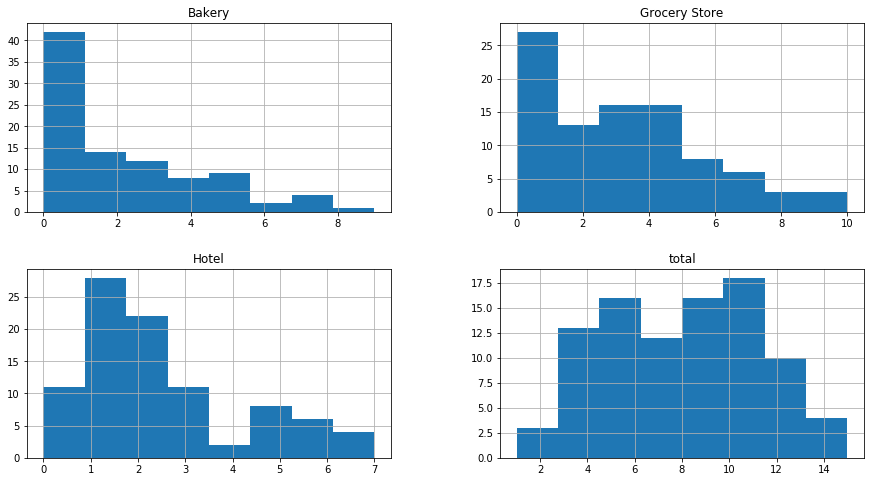

In [92]:
Canada_onehot_grouped_merged_W = Canada_onehot_grouped_merged [['Municipality', 'Bakery', 'Grocery Store' , 'Hotel' , 'total']] 
Canada_onehot_grouped_merged_W.hist( bins=8,log=False, figsize = (15,8) )


Drow a barchart that depicts the distribution of features on each Municipality

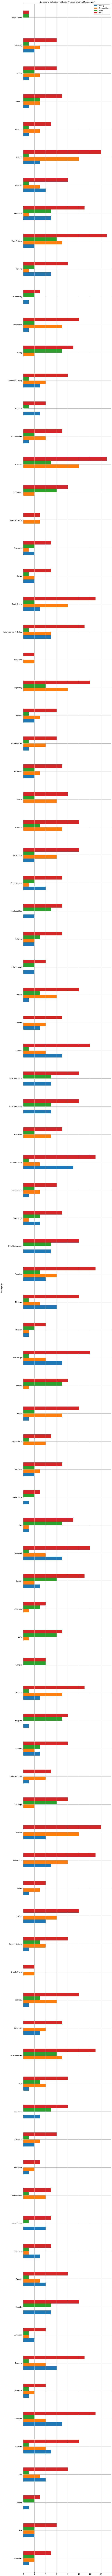

In [93]:
import pandas as pd
import matplotlib.pyplot as plot
plot.rcParams["figure.figsize"] = [10, 300]
Canada_onehot_grouped_merged_W = Canada_onehot_grouped_merged [['Municipality', 'Bakery', 'Grocery Store' , 'Hotel' , 'total']] 
Canada_onehot_grouped_merged_W.plot.barh(x="Municipality" ,  rot=0, title="Number of Selected Features' Venues in each Municipality");
plot.grid()

In [94]:
Canada_onehot_grouped_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Municipality           92 non-null     object 
 1   Bakery                 92 non-null     uint8  
 2   Grocery Store          92 non-null     uint8  
 3   Hotel                  92 non-null     uint8  
 4   total                  92 non-null     uint8  
 5   Latitude               92 non-null     int64  
 6   Longitude              92 non-null     int64  
 7   Venue                  92 non-null     int64  
 8   Venue Latitude         92 non-null     int64  
 9   Venue Longitude        92 non-null     int64  
 10  Venue Category         92 non-null     int64  
 11  Province               92 non-null     object 
 12  Land area(km2, 2011)   92 non-null     float64
 13  Growth Rate 2011–2016  92 non-null     object 
 14  Population2016         92 non-null     int64  
 15  lat     

Let us drow heat map for total venues


In [95]:
Canada_onehot_grouped_merged['marker_color'] = pd.cut(Canada_onehot_grouped_merged['total'], bins=3, 
                              labels=[ ' #FFA500','#1E90FF', 'red' ])
m = folium.Map(location=[latitude, longitude], zoom_start=2)
for index, row in Canada_onehot_grouped_merged.iterrows():
    label = str(Canada_onehot_grouped_merged.loc[index,'Municipality']) +',Venues= ' +str( Canada_onehot_grouped_merged.loc[index,'total'])
    folium.CircleMarker([row['lat'], row['lng']],
                    radius=3, popup= label, color=row['marker_color']).add_to(m)
m

Let us drow heat map for total Bakery


In [96]:
Canada_onehot_grouped_merged['marker_color'] = pd.cut(Canada_onehot_grouped_merged['Bakery'], bins=3, 
                              labels=[ ' #FFA500','#1E90FF', 'red' ])
m = folium.Map(location=[latitude, longitude], zoom_start=2)
for index, row in Canada_onehot_grouped_merged.iterrows():
    label = str(Canada_onehot_grouped_merged.loc[index,'Municipality']) +',Bakery= ' +str( Canada_onehot_grouped_merged.loc[index,'Bakery'])
    folium.CircleMarker([row['lat'], row['lng']],
                    radius=3, popup= label, color=row['marker_color']).add_to(m)
m
   

Let us drow heat map for Hotel

In [97]:
Canada_onehot_grouped_merged['marker_color'] = pd.cut(Canada_onehot_grouped_merged['Hotel'], bins=3, 
                              labels=[ ' #FFA500','#1E90FF', 'red' ])
m = folium.Map(location=[latitude, longitude], zoom_start=2)
for index, row in Canada_onehot_grouped_merged.iterrows():
    label = str(Canada_onehot_grouped_merged.loc[index,'Municipality']) +',Hotel= ' +str( Canada_onehot_grouped_merged.loc[index,'Hotel'])
    folium.CircleMarker([row['lat'], row['lng']],
                    radius=3, popup= label, color=row['marker_color']).add_to(m)
m

Let us drow heat map for Hotel

In [98]:
Canada_onehot_grouped_merged['marker_color'] = pd.cut(Canada_onehot_grouped_merged['Grocery Store'], bins=3, 
                              labels=[ ' #FFA500','#1E90FF', 'red' ])
m = folium.Map(location=[latitude, longitude], zoom_start=2)
for index, row in Canada_onehot_grouped_merged.iterrows():
    label = str(Canada_onehot_grouped_merged.loc[index,'Municipality']) +',Grocery Store= ' +str( Canada_onehot_grouped_merged.loc[index,'Grocery Store'])
    folium.CircleMarker([row['lat'], row['lng']],
                    radius=3, popup= label, color=row['marker_color']).add_to(m)
m

In [99]:
Canada_onehot_grouped_merged.loc [Canada_onehot_grouped_merged['Municipality']== 'Montreal']

Municipality  Bakery  Grocery Store  Hotel  total  Latitude  Longitude  \
45     Montreal       6              3      1     10       100        100   

    Venue  Venue Latitude  Venue Longitude  Venue Category Province  \
45    100             100              100             100   Quebec   

    Land area(km2, 2011) Growth Rate 2011–2016  Population2016      lat  \
45                 365.1                 3.34%         1704694  45.4972   

        lng  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
45 -73.6104               1                Bakery         Grocery Store   

   3rd Most Common Venue marker_color  
45                 Hotel      #FFA500

In [100]:
#explore cluster 0

In [101]:
Cluster_zero =  Canada_onehot_grouped_merged[Canada_onehot_grouped_merged['Cluster Labels']== 0.0 ]

Cluster_zero.sort_values(by=['total'], inplace=True, ascending=False)
Cluster_zero.reset_index(drop=True,inplace=True )
Cluster_zero

/Users/hayfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Municipality  Bakery  Grocery Store  Hotel  total  Latitude  \
0      Trois-Rivières       2              7      6     15       100   
1          St. Albert       0             10      5     15        89   
2            Hamilton       4             10      0     14       100   
3            Victoria       3             10      1     14        53   
4        Saint-Jérôme       3              8      2     13       100   
5        Halton Hills       5              8      0     13       100   
6             Nanaimo       4              6      3     13       100   
7       Drummondville       0              7      6     13        99   
8            Saguenay       0              8      4     12        74   
9           Kitchener       3              7      1     11       100   
10             Ottawa       1              6      3     10       100   
11           Gatineau       1              6      3     10       100   
12             Milton       1              7      2     10       100   
13             Guelph       4              6      0     10       100   
14         Terrebonne       1              7      2     10        71   
15        Quebec City       2              6      2     10       100   
16           Red Deer       0              7      3     10        86   
17             Regina       0              6      2      8        93   
18  Strathcona County       3              4      1      8       100   
19    Greater Sudbury       1              4      3      8       100   
20              Delta       1              4      3      8        96   
21     St. Catharines       1              4      2      7       100   
22            Markham       2              3      2      7       100   
23             Oshawa       3              4      0      7       100   
24           Edmonton       3              4      0      7       100   
25            Welland       1              3      3      7       100   
26           Richmond       2              3      2      7       100   
27          North Bay       0              5      2      7        77   
28            Saanich       2              3      1      6       100   
29             Whitby       1              3      2      6       100   
30           Winnipeg       2              3      1      6       100   
31      Richmond Hill       1              4      1      6       100   
32      Niagara Falls       1              3      2      6       100   
33         Clarington       2              3      1      6       100   
34       Medicine Hat       0              4      1      5        45   
35     Kawartha Lakes       1              4      0      5       100   
36           Waterloo       1              3      1      5       100   
37       Chatham-Kent       0              4      1      5       100   
38         Abbotsford       1              2      2      5       100   
39          Brantford       1              2      1      4       100   
40            Halifax       1              3      0      4       100   
41   Sault Ste. Marie       0              3      0      3        48   
42         Chilliwack       1              2      0      3        92   
43         Saint John       0              2      0      2        60   
44     Grande Prairie       0              2      0      2        47   

    Longitude  Venue  Venue Latitude  Venue Longitude  Venue Category  \
0         100    100             100              100             100   
1          89     89              89               89              89   
2         100    100             100              100             100   
3          53     53              53               53              53   
4         100    100             100              100             100   
5         100    100             100              100             100   
6         100    100             100              100             100   
7          99     99              99               99              99   
8          74     74              74   

In [102]:
Cluster_zero[['Municipality','Province','Bakery', 'Grocery Store', 'Hotel','total','Venue','Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']]



Municipality          Province  Bakery  Grocery Store  Hotel  total  \
0      Trois-Rivières            Quebec       2              7      6     15   
1          St. Albert           Alberta       0             10      5     15   
2            Hamilton           Ontario       4             10      0     14   
3            Victoria  British Columbia       3             10      1     14   
4        Saint-Jérôme            Quebec       3              8      2     13   
5        Halton Hills           Ontario       5              8      0     13   
6             Nanaimo  British Columbia       4              6      3     13   
7       Drummondville            Quebec       0              7      6     13   
8            Saguenay            Quebec       0              8      4     12   
9           Kitchener           Ontario       3              7      1     11   
10             Ottawa           Ontario       1              6      3     10   
11           Gatineau            Quebec       1              6      3     10   
12             Milton           Ontario       1              7      2     10   
13             Guelph           Ontario       4              6      0     10   
14         Terrebonne            Quebec       1              7      2     10   
15        Quebec City            Quebec       2              6      2     10   
16           Red Deer           Alberta       0              7      3     10   
17             Regina      Saskatchewan       0              6      2      8   
18  Strathcona County           Alberta       3              4      1      8   
19    Greater Sudbury           Ontario       1              4      3      8   
20              Delta  British Columbia       1              4      3      8   
21     St. Catharines           Ontario       1              4      2      7   
22            Markham           Ontario       2              3      2      7   
23             Oshawa           Ontario       3              4      0      7   
24           Edmonton           Alberta       3              4      0      7   
25            Welland           Ontario       1              3      3      7   
26           Richmond  British Columbia       2              3      2      7   
27          North Bay           Ontario       0              5      2      7   
28            Saanich  British Columbia       2              3      1      6   
29             Whitby           Ontario       1              3      2      6   
30           Winnipeg          Manitoba       2              3      1      6   
31      Richmond Hill           Ontario       1              4      1      6   
32      Niagara Falls           Ontario       1              3      2      6   
33         Clarington           Ontario       2              3      1      6   
34       Medicine Hat           Alberta       0              4      1      5   
35     Kawartha Lakes           Ontario       1              4      0      5   
36           Waterloo           Ontario       1              3      1      5   
37       Chatham-Kent           Ontario       0              4      1      5   
38         Abbotsford  British Columbia       1              2      2      5   
39          Brantford           Ontario       1              2      1      4   
40            Halifax       Nova Scotia       1              3      0      4   
41   Sault Ste. Marie           Ontario       0              3      0      3   
42         Chilliwack  British Columbia       1              2      0      3   
43         Saint John     New Brunswick       0              2      0      2   
44     Grande Prairie           Alberta       0              2      0      2   

    Venue  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0     100               0         Grocery Store                 Hotel   
1      89               0         Grocery Store                 Hotel   
2     100               0         Grocery Store                Bakery   
3      53               0         Gr

Features of Clster zero

In [103]:
Canada_onehot_grouped_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Municipality           92 non-null     object  
 1   Bakery                 92 non-null     uint8   
 2   Grocery Store          92 non-null     uint8   
 3   Hotel                  92 non-null     uint8   
 4   total                  92 non-null     uint8   
 5   Latitude               92 non-null     int64   
 6   Longitude              92 non-null     int64   
 7   Venue                  92 non-null     int64   
 8   Venue Latitude         92 non-null     int64   
 9   Venue Longitude        92 non-null     int64   
 10  Venue Category         92 non-null     int64   
 11  Province               92 non-null     object  
 12  Land area(km2, 2011)   92 non-null     float64 
 13  Growth Rate 2011–2016  92 non-null     object  
 14  Population2016         92 non-null     int64

In [104]:
Cluster_one =  Canada_onehot_grouped_merged[Canada_onehot_grouped_merged['Cluster Labels']== 1.0 ]
Cluster_one.sort_values(by=['total'], inplace=True, ascending=False)
Cluster_one.reset_index(drop=True,inplace=True )
Cluster_one

/Users/hayfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Municipality  Bakery  Grocery Store  Hotel  total  Latitude  \
0             Norfolk County       9              3      1     13       100   
1                   Brampton       7              4      2     13       100   
2                   Oakville       7              4      1     12       100   
3                  Longueuil       7              4      1     12       100   
4                Mississauga       7              4      1     12       100   
5                   Brossard       6              4      1     11       100   
6                  Vancouver       5              1      5     11       100   
7   Saint-Jean-sur-Richelieu       5              5      1     11       100   
8                 Blainville       5              4      1     10       100   
9                    Burnaby       5              0      5     10       100   
10           North Vancouver       5              0      5     10       100   
11           North Vancouver       5              0      5     10       100   
12                  Montreal       6              3      1     10       100   
13           New Westminster       5              0      5     10       100   
14                   Vaughan       4              3      1      8       100   
15                   Kelowna       3              2      3      8       100   
16                    Barrie       4              3      1      8       100   
17                   Toronto       5              1      2      8       100   
18                   Caledon       4              3      1      8       100   
19                 Pickering       2              2      3      7       100   
20             Prince George       4              1      2      7       100   
21                 Newmarket       3              1      3      7       100   
22                      Ajax       2              2      2      6       100   
23               Cape Breton       4              0      1      5        35   
24                    Sarnia       2              2      1      5       100   
25                 Saskatoon       2              1      2      5        64   
26                 Cambridge       3              1      1      5       100   
27              Peterborough       2              0      2      4       100   
28                St. John's       3              0      1      4        55   
29                Burlington       2              1      1      4       100   

    Longitude  Venue  Venue Latitude  Venue Longitude  Venue Category  \
0         100    100             100              100             100   
1         100    100             100              100             100   
2         100    100             100              100             100   
3         100    100             100              100             100   
4         100    100             100              100             100   
5         100    100             100              100             100   
6         100    100             100              100             100   
7         100    100             100              100             100   
8         100    100             100              100             100   
9         100    100             100              100             100   
10        100    100             100              100             100   
11        100    100             100              100             100   
12        100    100             100              100             100   
13        100    100             100              100             100   
14        100    100             100              100             100   
15        100    100             100              100             100   
16        100    100             100              100             100   
17        100    100             100              100             100   
18        100    100             100              100             100   
19        100    100             100              100             100   
20        100    100             

In [105]:
Cluster_one[['Municipality','Province','Bakery', 'Grocery Store', 'Hotel','total','Venue','Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']]



Municipality                   Province  Bakery  \
0             Norfolk County                    Ontario       9   
1                   Brampton                    Ontario       7   
2                   Oakville                    Ontario       7   
3                  Longueuil                     Quebec       7   
4                Mississauga                    Ontario       7   
5                   Brossard                     Quebec       6   
6                  Vancouver           British Columbia       5   
7   Saint-Jean-sur-Richelieu                     Quebec       5   
8                 Blainville                     Quebec       5   
9                    Burnaby           British Columbia       5   
10           North Vancouver           British Columbia       5   
11           North Vancouver           British Columbia       5   
12                  Montreal                     Quebec       6   
13           New Westminster           British Columbia       5   
14                   Vaughan                    Ontario       4   
15                   Kelowna           British Columbia       3   
16                    Barrie                    Ontario       4   
17                   Toronto                    Ontario       5   
18                   Caledon                    Ontario       4   
19                 Pickering                    Ontario       2   
20             Prince George           British Columbia       4   
21                 Newmarket                    Ontario       3   
22                      Ajax                    Ontario       2   
23               Cape Breton                Nova Scotia       4   
24                    Sarnia                    Ontario       2   
25                 Saskatoon               Saskatchewan       2   
26                 Cambridge                    Ontario       3   
27              Peterborough                    Ontario       2   
28                St. John's  Newfoundland and Labrador       3   
29                Burlington                    Ontario       2   

    Grocery Store  Hotel  total  Venue  Cluster Labels 1st Most Common Venue  \
0               3      1     13    100               1                Bakery   
1               4      2     13    100               1                Bakery   
2               4      1     12    100               1                Bakery   
3               4      1     12    100               1                Bakery   
4               4      1     12    100               1                Bakery   
5               4      1     11    100               1                Bakery   
6               1      5     11    100               1                 Hotel   
7               5      1     11    100               1         Grocery Store   
8               4      1     10    100               1                Bakery   
9               0      5     10    100               1                 Hotel   
10              0      5     10    100               1                 Hotel   
11              0      5     10    100               1                 Hotel   
12              3      1     10    100               1                Bakery   
13              0      5     10    100               1                 Hotel   
14              3      1      8    100               1                Bakery   
15              2      3      8    100               1                 Hotel   
16              3      1      8    100               1                Bakery   
17              1      2      8    100               1                Bakery   
18              3      1      8    100               1                Bakery   
19              2      3      7    100               1                 Hotel   
20              1      2      7    100               1                Bakery   
21              1      3      7    100               1                 Hotel   
22              2      2      6    100               1                 Hotel   
23              0 

In [106]:
Cluster_two =  Canada_onehot_grouped_merged[Canada_onehot_grouped_merged['Cluster Labels']== 2.0 ]
Cluster_two.sort_values(by=['total'], inplace=True, ascending=False)
Cluster_two.reset_index(drop=True,inplace=True )
Cluster_two

/Users/hayfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Municipality  Bakery  Grocery Store  Hotel  total  Latitude  Longitude  \
0           London       3              2      6     11       100        100   
1            Lévis       1              1      7      9        71         71   
2           Surrey       0              2      7      9       100        100   
3         Kamloops       0              2      6      8        82         82   
4         Kingston       1              0      7      8        76         76   
5        Coquitlam       3              0      5      8       100        100   
6          Mirabel       0              1      7      8       100        100   
7       Sherbrooke       0              2      6      8       100        100   
8            Laval       0              1      6      7        73         73   
9   Port Coquitlam       2              0      5      7       100        100   
10         Langley       0              0      4      4       100        100   
11      Lethbridge       0              1      3      4        48         48   
12         Moncton       1              1      2      4        66         66   
13     Thunder Bay       1              0      2      3        56         56   
14          Aurora       1              0      2      3        47         47   
15     Maple Ridge       1              0      2      3       100        100   
16    Wood Buffalo       0              0      1      1         6          6   

    Venue  Venue Latitude  Venue Longitude  Venue Category          Province  \
0     100             100              100             100           Ontario   
1      71              71               71              71            Quebec   
2     100             100              100             100  British Columbia   
3      82              82               82              82  British Columbia   
4      76              76               76              76           Ontario   
5     100             100              100             100  British Columbia   
6     100             100              100             100            Quebec   
7     100             100              100             100            Quebec   
8      73              73               73              73            Quebec   
9     100             100              100             100  British Columbia   
10    100             100              100             100  British Columbia   
11     48              48               48              48           Alberta   
12     66              66               66              66     New Brunswick   
13     56              56               56              56           Ontario   
14     47              47               47              47           Ontario   
15    100             100              100             100  British Columbia   
16      6               6                6               6           Alberta   

    Land area(km2, 2011) Growth Rate 2011–2016  Population2016      lat  \
0                 420.60                 4.83%          383822  51.5073   
1                 449.30                 3.35%          143414  47.6528   
2                 316.40                10.60%          517887  51.2715   
3                 299.20                 5.37%           90280  50.6758   
4                 451.20                 0.35%          123798  17.9712   
5                 122.30                10.14%          139284  49.2843   
6                 485.07                20.39%           50513  44.6087   
7                 353.50                 4.35%          161323  45.4033   
8                 247.10                 5.34%          422993   48.071   
9                  29.20                 4.74%           58612  49.2622   
10                308.00                12.58%          117285  48.3605   
11                122.40                11.51%           92729  49.6943   
12                141.20                 4.08%           71889   46.098   
13                328.20                -0.41%          107909  48.4064   

In [107]:
Cluster_two[['Municipality','Province','Bakery', 'Grocery Store', 'Hotel','total','Venue','Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']]


Municipality          Province  Bakery  Grocery Store  Hotel  total  \
0           London           Ontario       3              2      6     11   
1            Lévis            Quebec       1              1      7      9   
2           Surrey  British Columbia       0              2      7      9   
3         Kamloops  British Columbia       0              2      6      8   
4         Kingston           Ontario       1              0      7      8   
5        Coquitlam  British Columbia       3              0      5      8   
6          Mirabel            Quebec       0              1      7      8   
7       Sherbrooke            Quebec       0              2      6      8   
8            Laval            Quebec       0              1      6      7   
9   Port Coquitlam  British Columbia       2              0      5      7   
10         Langley  British Columbia       0              0      4      4   
11      Lethbridge           Alberta       0              1      3      4   
12         Moncton     New Brunswick       1              1      2      4   
13     Thunder Bay           Ontario       1              0      2      3   
14          Aurora           Ontario       1              0      2      3   
15     Maple Ridge  British Columbia       1              0      2      3   
16    Wood Buffalo           Alberta       0              0      1      1   

    Venue  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0     100               2                 Hotel                Bakery   
1      71               2                 Hotel         Grocery Store   
2     100               2                 Hotel         Grocery Store   
3      82               2                 Hotel         Grocery Store   
4      76               2                 Hotel                Bakery   
5     100               2                 Hotel                Bakery   
6     100               2                 Hotel         Grocery Store   
7     100               2                 Hotel         Grocery Store   
8      73               2                 Hotel         Grocery Store   
9     100               2                 Hotel                Bakery   
10    100               2                 Hotel         Grocery Store   
11     48               2                 Hotel         Grocery Store   
12     66               2                 Hotel         Grocery Store   
13     56               2                 Hotel                Bakery   
14     47               2                 Hotel                Bakery   
15    100               2                 Hotel                Bakery   
16      6               2                 Hotel         Grocery Store   

   3rd Most Common Venue  
0          Grocery Store  
1                 Bakery  
2                 Bakery  
3                 Bakery  
4          Grocery Store  
5          Grocery Store  
6                 Bakery  
7                 Bakery  
8                 Bakery  
9          Grocery Store  
10                Bakery  
11                Bakery  
12                Bakery  
13         Grocery Store  
14         Grocery Store  
15         Grocery Store  
16                Bakery

Depict Clusters' Features

In [108]:
Canada_onehot_grouped_merged 

Municipality  Bakery  Grocery Store  Hotel  total  Latitude  \
0                 Abbotsford       1              2      2      5       100   
1                       Ajax       2              2      2      6       100   
2                     Aurora       1              0      2      3        47   
3                     Barrie       4              3      1      8       100   
4                 Blainville       5              4      1     10       100   
5                   Brampton       7              4      2     13       100   
6                  Brantford       1              2      1      4       100   
7                   Brossard       6              4      1     11       100   
8                 Burlington       2              1      1      4       100   
9                    Burnaby       5              0      5     10       100   
10                   Caledon       4              3      1      8       100   
11                 Cambridge       3              1      1      5       100   
12               Cape Breton       4              0      1      5        35   
13              Chatham-Kent       0              4      1      5       100   
14                Chilliwack       1              2      0      3        92   
15                Clarington       2              3      1      6       100   
16                 Coquitlam       3              0      5      8       100   
17                     Delta       1              4      3      8        96   
18             Drummondville       0              7      6     13        99   
19                  Edmonton       3              4      0      7       100   
20                  Gatineau       1              6      3     10       100   
21            Grande Prairie       0              2      0      2        47   
22           Greater Sudbury       1              4      3      8       100   
23                    Guelph       4              6      0     10       100   
24                   Halifax       1              3      0      4       100   
25              Halton Hills       5              8      0     13       100   
26                  Hamilton       4             10      0     14       100   
27                  Kamloops       0              2      6      8        82   
28            Kawartha Lakes       1              4      0      5       100   
29                   Kelowna       3              2      3      8       100   
30                  Kingston       1              0      7      8        76   
31                 Kitchener       3              7      1     11       100   
32                   Langley       0              0      4      4       100   
33                     Laval       0              1      6      7        73   
34                Lethbridge       0              1      3      4        48   
35                    London       3              2      6     11       100   
36                 Longueuil       7              4      1     12       100   
37                     Lévis       1              1      7      9        71   
38               Maple Ridge       1              0      2      3       100   
39                   Markham       2              3      2      7       100   
40              Medicine Hat       0              4      1      5        45   
41                    Milton       1              7      2     10       100   
42                   Mirabel       0              1      7      8       100   
43               Mississauga       7              4      1     12       100   
44                   Moncton       1              1      2      4        66   
45                  Montreal       6              3      1     10       100   
46                   Nanaimo       4              6      3     13       100   
47           New Westminster       5              0      5     10       100   
48                 Newmarket       3              1      3      7       100   
49             Niagara Falls       1              3      2      6 

In [109]:
Canada_onehot_grouped_merged_clusters=Canada_onehot_grouped_merged

Canada_onehot_grouped_merged_clusters = Canada_onehot_grouped_merged_clusters.groupby("Cluster Labels").agg ({'Bakery': 'sum','Grocery Store': 'sum','Hotel': 'sum', 'total': 'sum'})

Canada_onehot_grouped_merged_clusters [['Bakery', 'Grocery Store','Hotel']]

Bakery  Grocery Store  Hotel
Cluster Labels                              
0                   66            220     77
1                  133             59     62
2                   14             13     78

In [110]:
Canada_onehot_grouped_merged_clusters1=Canada_onehot_grouped_merged_clusters

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a226a7550>,
      dtype=object)

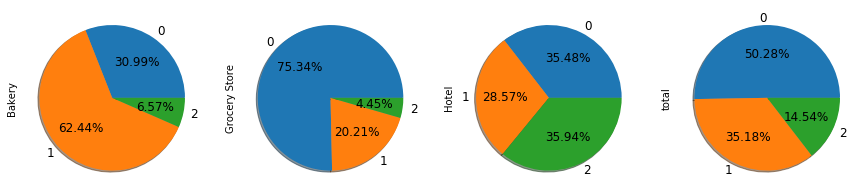

In [111]:
# Draw  pie  charts
Canada_onehot_grouped_merged_clusters.plot.pie(subplots=True, figsize=(15, 30),shadow = True,fontsize=12, autopct='%1.2f%%', startangle=0,legend=False )


In [112]:
Canada_onehot_grouped_merged_clusters

Bakery  Grocery Store  Hotel  total
Cluster Labels                                     
0                   66            220     77  363.0
1                  133             59     62  254.0
2                   14             13     78  105.0

In [113]:
#import pandas as pd
#import matplotlib.pyplot as plot
#plot.rcParams["figure.figsize"] = [10, 5]
#Canada_onehot_grouped_merged_clusters.plot.bar(mark_right=True, rot=0, title="Number of Selected Features' Venues in each Municipality);
#plot.grid()
#mark_right=True
#Canada_onehot_grouped_merged_clusters

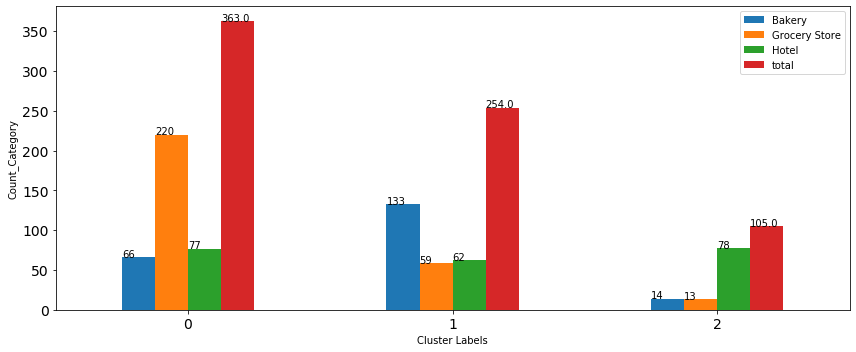

In [114]:
ax = Canada_onehot_grouped_merged_clusters.plot.bar( rot=0,figsize = (12,5),fontsize =14)
ax.set_ylabel('Count_Category')
from decimal import Decimal
import matplotlib.pyplot as plt
for p in ax.patches:
    ax.annotate('{:.5}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.tight_layout()
plt.show()

# Hierarchical Agglomerative Clustering   

In [115]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
print ('ok')

ok


/Users/hayfa/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [116]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'single')

In [117]:
agglom.fit(Canada_grouped_clustering)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)

In [118]:
Canada_grouped.head(5)

Municipality    Bakery  Grocery Store     Hotel  Clus_km
0   Abbotsford  0.200000       0.400000  0.400000        0
1         Ajax  0.333333       0.333333  0.333333        1
2       Aurora  0.333333       0.000000  0.666667        2
3       Barrie  0.500000       0.375000  0.125000        1
4   Blainville  0.500000       0.400000  0.100000        1

In [119]:
Canada_grouped_clustering.head()

Bakery  Grocery Store     Hotel
0  0.200000       0.400000  0.400000
1  0.333333       0.333333  0.333333
2  0.333333       0.000000  0.666667
3  0.500000       0.375000  0.125000
4  0.500000       0.400000  0.100000

Dendrogram Associated for the Agglomerative Hierarchical Clustering

In [120]:
dist_matrix = distance_matrix(Canada_grouped[['Bakery', 'Grocery Store', 'Hotel']],Canada_grouped[['Bakery', 'Grocery Store', 'Hotel']]) 
print(dist_matrix)

[[0.         0.16329932 0.49888765 ... 0.12472191 0.28674418 0.74833148]
 [0.16329932 0.         0.47140452 ... 0.23570226 0.23570226 0.81649658]
 [0.49888765 0.47140452 0.         ... 0.62360956 0.70710678 0.47140452]
 ...
 [0.12472191 0.23570226 0.62360956 ... 0.         0.23570226 0.84983659]
 [0.28674418 0.23570226 0.70710678 ... 0.23570226 0.         1.02740233]
 [0.74833148 0.81649658 0.47140452 ... 0.84983659 1.02740233 0.        ]]


Using the linkage class from hierarchy, pass in the parameters:

The distance matrix
'complete' for complete linkage

Save the result to a variable called Z

In [121]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(dist_matrix, 'average')

/Users/hayfa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

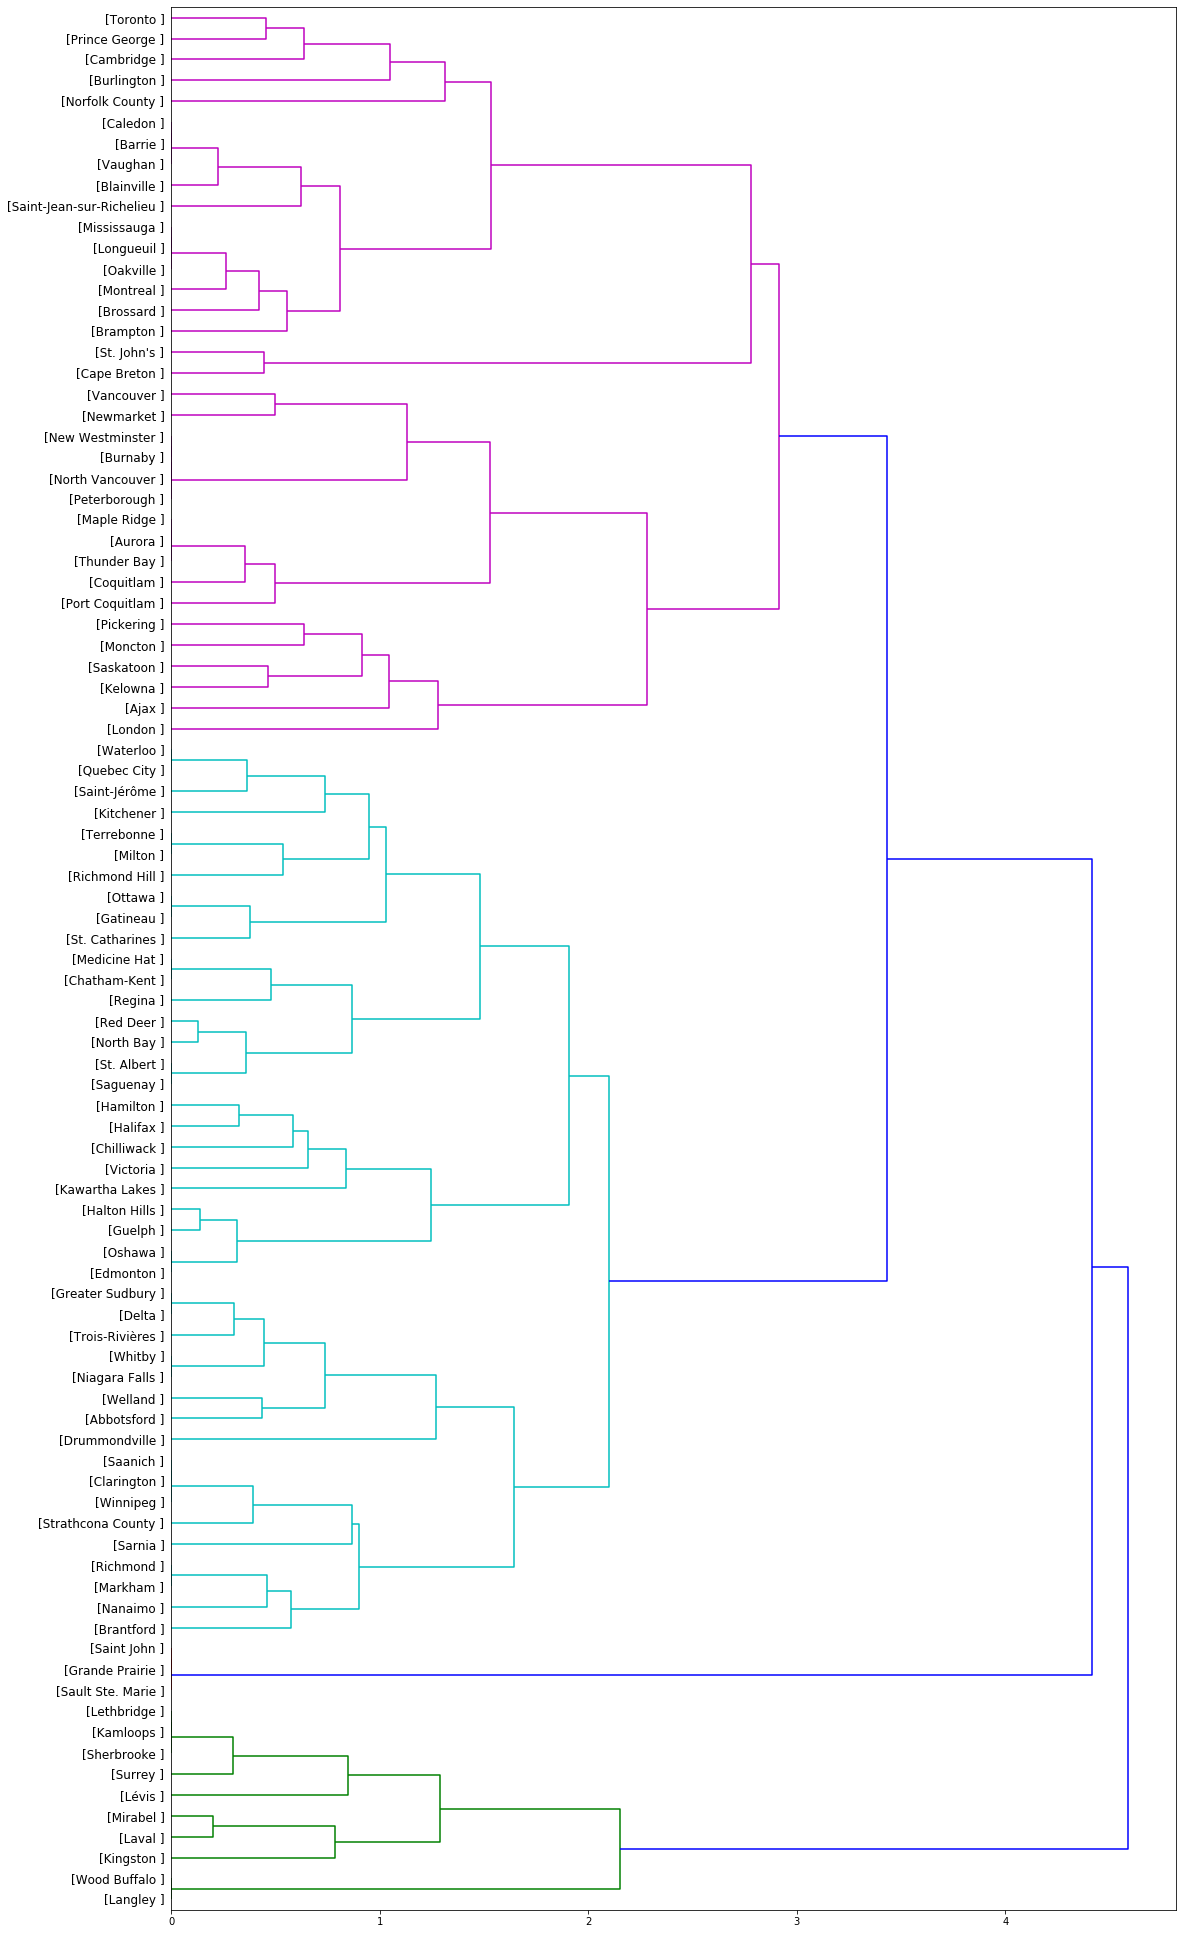

In [122]:
fig = pylab.figure(figsize=(18,35))
def llf(id):
    return '[%s ]' % (Canada_grouped['Municipality'][id],) 
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [123]:
label11= agglom.labels_

In [124]:
np.info(label11)

class:  ndarray
shape:  (91,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fbb98a84e00
byteorder:  little
byteswap:  False
type: int64


In [125]:
Canada_grouped['Clus_km'].value= ['label11']
Canada_grouped

Municipality    Bakery  Grocery Store     Hotel  Clus_km
0                 Abbotsford  0.200000       0.400000  0.400000        0
1                       Ajax  0.333333       0.333333  0.333333        1
2                     Aurora  0.333333       0.000000  0.666667        2
3                     Barrie  0.500000       0.375000  0.125000        1
4                 Blainville  0.500000       0.400000  0.100000        1
5                   Brampton  0.538462       0.307692  0.153846        1
6                  Brantford  0.250000       0.500000  0.250000        0
7                   Brossard  0.545455       0.363636  0.090909        1
8                 Burlington  0.500000       0.250000  0.250000        1
9                    Burnaby  0.500000       0.000000  0.500000        1
10                   Caledon  0.500000       0.375000  0.125000        1
11                 Cambridge  0.600000       0.200000  0.200000        1
12               Cape Breton  0.800000       0.000000  0.200000        1
13              Chatham-Kent  0.000000       0.800000  0.200000        0
14                Chilliwack  0.333333       0.666667  0.000000        0
15                Clarington  0.333333       0.500000  0.166667        0
16                 Coquitlam  0.375000       0.000000  0.625000        2
17                     Delta  0.125000       0.500000  0.375000        0
18             Drummondville  0.000000       0.538462  0.461538        0
19                  Edmonton  0.428571       0.571429  0.000000        0
20                  Gatineau  0.100000       0.600000  0.300000        0
21            Grande Prairie  0.000000       1.000000  0.000000        0
22           Greater Sudbury  0.125000       0.500000  0.375000        0
23                    Guelph  0.400000       0.600000  0.000000        0
24                   Halifax  0.250000       0.750000  0.000000        0
25              Halton Hills  0.384615       0.615385  0.000000        0
26                  Hamilton  0.285714       0.714286  0.000000        0
27                  Kamloops  0.000000       0.250000  0.750000        2
28            Kawartha Lakes  0.200000       0.800000  0.000000        0
29                   Kelowna  0.375000       0.250000  0.375000        1
30                  Kingston  0.125000       0.000000  0.875000        2
31                 Kitchener  0.272727       0.636364  0.090909        0
32                   Langley  0.000000       0.000000  1.000000        2
33                     Laval  0.000000       0.142857  0.857143        2
34                Lethbridge  0.000000       0.250000  0.750000        2
35                    London  0.272727       0.181818  0.545455        2
36                 Longueuil  0.583333       0.333333  0.083333        1
37                     Lévis  0.111111       0.111111  0.777778        2
38               Maple Ridge  0.333333       0.000000  0.666667        2
39                   Markham  0.285714       0.428571  0.285714        0
40              Medicine Hat  0.000000       0.800000  0.200000        0
41                    Milton  0.100000       0.700000  0.200000        0
42                   Mirabel  0.000000       0.125000  0.875000        2
43               Mississauga  0.583333       0.333333  0.083333        1
44                   Moncton  0.250000       0.250000  0.500000        2
45                  Montreal  0.600000       0.300000  0.100000        1
46                   Nanaimo  0.307692       0.461538  0.230769        0
47           New Westminster  0.500000       0.000000  0.500000        1
48                 Newmarket  0.428571       0.142857  0.428571        1
49             Niagara Falls  0.166667       0.500000  0.333333        0
50            Norfolk County  0.692308       0.230769  0.076923        1
51                 North Bay  0.000000       0.714286  0.285714        0
52           North Vancouver  0.500000       0.000000  0.500000        1
53                  Oakville  0.583333       0.333333  0.083333        1
5

In [126]:
Canada_onehot_grouped_merged

Municipality  Bakery  Grocery Store  Hotel  total  Latitude  \
0                 Abbotsford       1              2      2      5       100   
1                       Ajax       2              2      2      6       100   
2                     Aurora       1              0      2      3        47   
3                     Barrie       4              3      1      8       100   
4                 Blainville       5              4      1     10       100   
5                   Brampton       7              4      2     13       100   
6                  Brantford       1              2      1      4       100   
7                   Brossard       6              4      1     11       100   
8                 Burlington       2              1      1      4       100   
9                    Burnaby       5              0      5     10       100   
10                   Caledon       4              3      1      8       100   
11                 Cambridge       3              1      1      5       100   
12               Cape Breton       4              0      1      5        35   
13              Chatham-Kent       0              4      1      5       100   
14                Chilliwack       1              2      0      3        92   
15                Clarington       2              3      1      6       100   
16                 Coquitlam       3              0      5      8       100   
17                     Delta       1              4      3      8        96   
18             Drummondville       0              7      6     13        99   
19                  Edmonton       3              4      0      7       100   
20                  Gatineau       1              6      3     10       100   
21            Grande Prairie       0              2      0      2        47   
22           Greater Sudbury       1              4      3      8       100   
23                    Guelph       4              6      0     10       100   
24                   Halifax       1              3      0      4       100   
25              Halton Hills       5              8      0     13       100   
26                  Hamilton       4             10      0     14       100   
27                  Kamloops       0              2      6      8        82   
28            Kawartha Lakes       1              4      0      5       100   
29                   Kelowna       3              2      3      8       100   
30                  Kingston       1              0      7      8        76   
31                 Kitchener       3              7      1     11       100   
32                   Langley       0              0      4      4       100   
33                     Laval       0              1      6      7        73   
34                Lethbridge       0              1      3      4        48   
35                    London       3              2      6     11       100   
36                 Longueuil       7              4      1     12       100   
37                     Lévis       1              1      7      9        71   
38               Maple Ridge       1              0      2      3       100   
39                   Markham       2              3      2      7       100   
40              Medicine Hat       0              4      1      5        45   
41                    Milton       1              7      2     10       100   
42                   Mirabel       0              1      7      8       100   
43               Mississauga       7              4      1     12       100   
44                   Moncton       1              1      2      4        66   
45                  Montreal       6              3      1     10       100   
46                   Nanaimo       4              6      3     13       100   
47           New Westminster       5              0      5     10       100   
48                 Newmarket       3              1      3      7       100   
49             Niagara Falls       1              3      2      6 

In [127]:
Canada_onehot_grouped_merged[['Bakery', 'Grocery Store','Hotel']]

Bakery  Grocery Store  Hotel
0        1              2      2
1        2              2      2
2        1              0      2
3        4              3      1
4        5              4      1
5        7              4      2
6        1              2      1
7        6              4      1
8        2              1      1
9        5              0      5
10       4              3      1
11       3              1      1
12       4              0      1
13       0              4      1
14       1              2      0
15       2              3      1
16       3              0      5
17       1              4      3
18       0              7      6
19       3              4      0
20       1              6      3
21       0              2      0
22       1              4      3
23       4              6      0
24       1              3      0
25       5              8      0
26       4             10      0
27       0              2      6
28       1              4      0
29       3              2      3
30       1              0      7
31       3              7      1
32       0              0      4
33       0              1      6
34       0              1      3
35       3              2      6
36       7              4      1
37       1              1      7
38       1              0      2
39       2              3      2
40       0              4      1
41       1              7      2
42       0              1      7
43       7              4      1
44       1              1      2
45       6              3      1
46       4              6      3
47       5              0      5
48       3              1      3
49       1              3      2
50       9              3      1
51       0              5      2
52       5              0      5
53       5              0      5
54       7              4      1
55       3              4      0
56       1              6      3
57       2              0      2
58       2              2      3
59       2              0      5
60       4              1      2
61       2              6      2
62       0              7      3
63       0              6      2
64       2              3      2
65       1              4      1
66       2              3      1
67       0              8      4
68       0              2      0
69       5              5      1
70       3              8      2
71       2              2      1
72       2              1      2
73       0              3      0
74       0              2      6
75       0             10      5
76       1              4      2
77       3              0      1
78       3              4      1
79       0              2      7
80       1              7      2
81       1              0      2
82       5              1      2
83       2              7      6
84       5              1      5
85       4              3      1
86       3             10      1
87       1              3      1
88       1              3      3
89       1              3      2
90       2              3      1
91       0              0      1

# End of Capstone Assignment